# Klasse C  Versterkers

<a href="./slides/Klasse-C.slides.html" target="_blank">![slides](./images/slides-beschikbaar-blue.svg)</a> 

In [1]:
%run ../common/cursusdef.py

In de vorige hoofdstukken hebben we de laagfrequent versterkers besproken. Dit zijn versterkers met typisch een relatief grote bandbreedte. Verder hebben we de laagfrequent versterkers verder opgedeeld in de versterkers met 1 vermogen transistor in de vermogentrap (Klasse A) en de versterkers met 2 of meer vermogentransistors in de vermogentrap (Klasse B en Klasse G).
In dit hoofdstuk bestuderen we de klasse C versterker. Beide versterkers zijn resonante versterkers die bestaat uit een LRC trilkring (of meerdere LC kringen) die aangestuurd wordt door een enkele transistor. Als een gevolg hiervan werkt deze versterker op een vaste frequentie of binnen een zeer beperkte bandbreedte rond deze centrale frequentie. Deze bandbreedte is typisch maximaal 1%  van de resonantie frequentie.
In {numref}`vermogenversterkers` geven we een overzicht van deze verschillende versterkers.

```{table} Indeling van de vermogenversterkers
:name: vermogenversterkers

|   | laagfrequent of breedband  | hoogfrequent of resonant|
|:--| :-- | :-- |
|1 transistor <BR> in de vermogentrap  |Klasse A      |**Klasse C** <BR> Klasse F <BR>Klasse E|
|2 of meer  transistors <BR>in de vermogentrap |  Klasse B  <BR> Klasse G| Klasse D  |
```

De toepassingen liggen in de eerste plaats in het domain van de telecomunicatie waar de Klasse C versterker gebruikt wordt om signalen door te sturen, gemoduleerd op de draaggolf van de zender. Deze draaggolf heeft typisch een vaste frequentie.
Daarnaast zijn er nog industriele toepassingen mogelijk, zoals bijvoorbeeld het inductief verwarmen (zoals in smeltovens) of het dielectrisch verwarmen (voor het drogen, bakken en polymeriseren).

Het basisprincipe is steeds als het volgt:
We gebruiken de eigenfrequentie van een resonante kring om de oscillatie op de juiste frequentie te genereren en om harmonischen weg te filteren.
Deze resonante kring vormt de belasting van de vermogentransistor.
De vermogentransistor levert het vermogen dat verloren/uitgestraald wordt door de resonante kring.

{numref}`cfig1` toont het basisschema van de klasse C versterker.

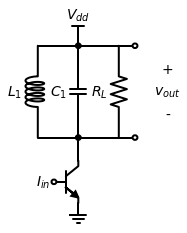

In [57]:
d = schem.Drawing()
T = d.add(e.BJT_NPN, lftlabel='$I_{in}$')
d.add(e.GND, xy=T.emitter)
d.add(e.DOT_OPEN, xy=T.base)
d.add(e.LINE, xy=T.collector, d='up', l=0.75)
d.add(e.DOT)
C1 = d.add(e.CAP, d='up', label='$C_1$')
d.add(e.LINE, xy=C1.start, d='left', l=1.25)
L1 = d.add(e.INDUCTOR2, d='up', label='$L_1$')
d.add(e.LINE, xy=C1.start, d='right', l=1.25)
R = d.add(e.RES, d='up', label='$R_L$')
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='right',l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='left', tox=C1.end)
d.add(e.DOT)
d.add(e.LINE, d='right',xy=L1.end, tox=C1.end)
d.add(e.LINE, d='up',l=0.25)
d.add(e.VDD, label='$V_{dd}$')
d.add(e.GAP_LABEL, d='up', xy= dot.start, toy= R.end, label=['-','$v_{out}$','$+$'],lblofst=-1)
d.draw()

We maken gebruik van de eigenfrequentie van de resonante kring om de oscillatie op de juiste frequentie te genereren en om de harmonischen weg te filteren. De resonante kring verliest vermogen tijdens de trilling en de vermogentransistor zal dit vermogen terug toevoegen aan de kring. Dit gebeurt door korte stroompulsen te leveren.

## Differentiaalvergelijking van de trilkring

Voordat we de werking van de versterker bekijken, bestuderen we in meer detail de trilkring en de bekomen trilling die we bekomen indien de trilling spontaan verloopt (i.e. niet aangestuurd door de transistor). Het schema dat we hiervoor bestuderen kan je zien in {numref}`cfigtrilkring`

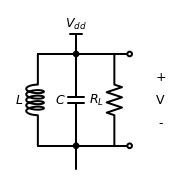

In [52]:
d = schem.Drawing()
d.add(e.LINE,  d='up', l=0.75)
d.add(e.DOT)
C1 = d.add(e.CAP, d='up', label='$C$')
d.add(e.LINE, xy=C1.start, d='left', l=1.25)
L1 = d.add(e.INDUCTOR2, d='up', label='$L$')
d.add(e.LINE, xy=C1.start, d='right', l=1.25)
R = d.add(e.RES, d='up', label='$R_L$')
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='right',l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='left', tox=C1.end)
d.add(e.DOT)
d.add(e.LINE, d='right',xy=L1.end, tox=C1.end)
d.add(e.LINE, d='up',l=0.25)
d.add(e.VDD, label='$V_{dd}$')
d.add(e.GAP_LABEL, d='up', xy= dot.start, toy= R.end, label=['-','V','$+$'],lblofst=-1)
d.draw()

Om de werking van dit schema te berekenen schrijven we de [eerste wet van Kirkhoff](https://nl.wikipedia.org/wiki/Elektriciteitswetten_van_Kirchhoff) op in de gemeenschappelijke knoop en de stroom-spanningsvergelijkingen op voor elk element. Deze vergelijkingen zijn:

$$ I_C+ I_R + I_L =0 $$

$$ Q_C= C V $$

$$ I_R R_L = V  $$

$$ L \frac{d I_L}{dt} = V $$

De stroom naar de condensator ($I_C$) kunnen we door de lading van de condensator ($Q_C$) af te leiden naar de tijd, dus $I_C =\frac{d Q_C}{dt}$. Hierdoor hebben we alle vergelijkingen reeds als functie van de stroom, namelijk:

$$ I_C+ I_R + I_L =0 $$

$$ I_C= C \frac{d V}{dt} $$

$$ I_R R_L = V  $$

$$ L \frac{d I_L}{dt} = V $$

Aangezien de stroom-spanningsvergelijking van het spoel de afgeleide van de stroom bevat, kunnen we de  [eerste wet van Kirkhoff](https://nl.wikipedia.org/wiki/Elektriciteitswetten_van_Kirchhoff) niet onmiddellijk gebruiken, maar we kunnen wel de afgeleide van deze wet gebruiken. De vergelijkingen worden dan: 

$$ \frac{d I_C}{dt}+ \frac{d I_R}{dt} + \frac{d I_L}{dt} =0 $$

$$ \frac{d I_C}{dt}= C \frac{d^2 V}{dt^2} $$

$$ \frac{d I_R}{dt}  =\frac{1}{R_L} \frac{d V}{dt}  $$

$$ \frac{d I_L}{dt} =\frac{1}{L} V $$

Invullen geeft dan:

$$C \frac{d^2 V}{dt^2} + \frac{1}{R_L} \frac{d V}{dt}  + \frac{1}{L} V = 0$$

Deze vergelijking kunnen we oplossen door de [Laplace transformatie](https://nl.wikipedia.org/wiki/Laplacetransformatie) te nemen van de functie $V(t)$. De bekomen oplossing is dan:

$$V(t)= V_o \cos(\omega t +\phi) \exp(-\beta t)$$

$$ \beta=\frac{1}{2 R_L C} $$

$$ \omega =\sqrt{\frac{1}{L C}- \beta^2}$$

Waarbij $V_o$ en $\phi$ de integratieconstanten zijn. {numref}`sinfunct` toont deze oplossing voor een uitdempende trilling van 50 V rond een spanning van 80 V. In het rood is de spanning aangegeven die we elke periode verliezen en die dus moet gecompenseerd worden om de trilling op gang te houden.

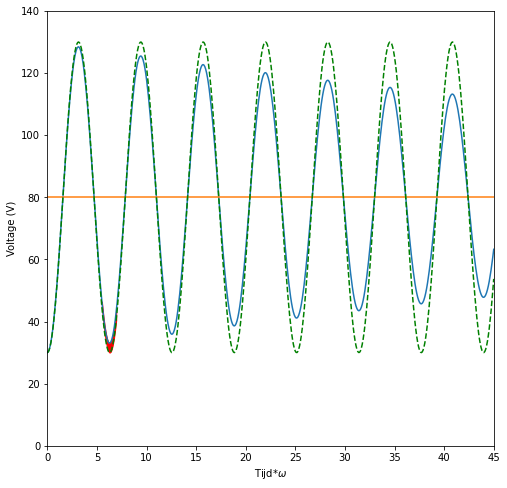

In [2]:
t=np.linspace(0,45,500)
V=80-50*np.cos(t)*np.exp(-0.01*t)
v_2=80+t*0.0
V_3=80-50*np.cos(t)
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(t,V)    
ax.plot(t,v_2)     
ax.plot(t,V_3, color='green',linestyle='--') 
ax.fill_between(t, V, V_3,where = (t > 5.5) & (t <= 7), color = 'r')
ax.set_xlabel('Tijd*$\omega$ ')
ax.set_ylabel('Voltage (V)')
ax.set_ylim(0,140)
ax.set_xlim(0,45);

## Keuze van de parameters van de resonante kring

Om een vermogenversterker te ontwerpen die actief is bij een bepaalde frequentie moeten in eerste instantie de parameters van de resonante kring gekozen worden, namelijk $L_1$  en $C_1$.
Deze parameters kunnen we bepalen op basis van de gegevens die de ingenieur normaal in een ontwerpopgave ter beschikking krijgt, namelijk de impedantie van de belasting $R_L$ en het maximum vermogen $P_{AC}$ dat moet geleverd kunnen worden op de frequentie $\omega$. Het is belangrijk dat we $\beta <<< \omega$ kiezen. In eerste instantie kunnen we bijvoorbeeld vertrekken van $\beta = 0.1 \omega$, waarna we dan 

$$ \beta=\frac{1}{2 R_L C_1} $$

gebruiken om de condensator $C_1$ te kiezen. Vervolgens gebruiken we

$$ \omega =\sqrt{\frac{1}{L_1 C_1}- \beta^2}$$

om de waarde van de spoel $L_1$ te kiezen. 

Merk op:

Aangezien we in de meeste gevallen $\beta <<< \omega$ kiezen kunnen we in deze gevallen vaak de resonatiefrequentie benaderen als:

$$ \omega =\sqrt{\frac{1}{L_1 C_1}}$$

Vervolgens gebruiken we de formule 

$$ P_{AC} =\frac{V_{AC}^2}{2 R_L}$$ 

om de spanningsamplitude te $V_{AC}$ te berekenen en dus daaruit ook de nodige voedingsspanning $V_{DD}$.

```{exercise} Ontwerpparameters klasse C versterker
:class: dropdown
Ontwerp een Klasse C versterker die gebruik maakt van een $\lambda /2$ antenne die een stralingsimpedantie heeft van 60 Ohm, om 10 W AC-vermogen uit te zenden op 104.7 MHz.
Kies geschikte waardes voor de capaciteit $C_1$ en de inductantie $L_1$. Bepaal ook de nodige voedingsspanning $V_{DD}$ 
```

## Aansturingsprincipe van de versterker

Het basis werkingsprincipe van de Klasse C versterker is als het volgt: We leggen een sinusvormige spanning met een negatieve offset aan de hand van een serieweerstand aan aan de basis van de bipolaire transistor. De ingang van de bipolaire transistor  vormt een diode naar de emitter en als gevolg hiervan loopt er enkel een basisstroom wanneer de ingangspanning positief is. Deze basisstroom wordt dan een factor $\beta_F$ versterkt in de collectorstroom. Deze gepulste collectorstroom wordt dan aangelegd aan de LRC trilkring. <cite id="cite2c-1031761/4VFK3Q4R"><a href="#cite2c|1031761/4VFK3Q4R">[1]</a></cite>

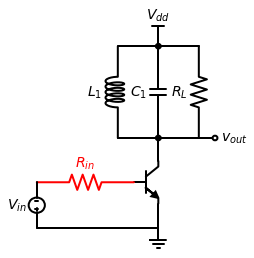

In [55]:
d = schem.Drawing()
T = d.add(e.BJT_NPN)
Ri = d.add(e.RES, d='left', xy=T.base, label='$R_{in}$', color='red')
#d.labelI(Ri, 'input current')
Vi = d.add(e.SOURCE_V,d='down',label='$V_{in}$', zoom=0.5)
d.add(e.LINE,d='right',  tox=T.emitter)
d.add(e.GND)
d.add(e.LINE,d='up',  toy=T.emitter)
d.add(e.LINE, xy=T.collector, d='up', l=0.75)
d.add(e.DOT)
C1 = d.add(e.CAP, d='up', label='$C_1$')
d.add(e.LINE, xy=C1.start, d='left', l=1.25)
L1 = d.add(e.INDUCTOR2, d='up', label='$L_1$')
d.add(e.LINE, xy=C1.start, d='right', l=1.25)
R = d.add(e.RES, d='up', label='$R_L$')
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN, rgtlabel='$v_{out}$')
d.add(e.LINE,xy=R.end, d='left', tox=C1.end)
d.add(e.DOT)
d.add(e.LINE, d='right',xy=L1.end, tox=C1.end)
d.add(e.LINE, d='up',l=0.25)
d.add(e.VDD, label='$V_{dd}$')
d.draw()

De onderstaande Widget laat toe te kijken wat de impact is van de instellingen aan de basis op de bekomen collector stroom. We leggen aan $V_{in}$ een negatieve DC spanning aan en een iets grotere AC spanningsamplitude. Dit heeft tot gevolg dat de spanning aan $V_{in}$ slechts een beperkt deel van de periode boven de 0.6V komt, wat de spanning is die nodig is om de basis-emitter junctie van de bipolaire transistor in geleiding te brengen.
De hoeveelheid stroom die we krijgn wordt bepaald door $R_{in}$ en deze stroom wordt dan vervolgens versterkt met een factor $\beta_F$ wat dan de collectorstroom oplevert.

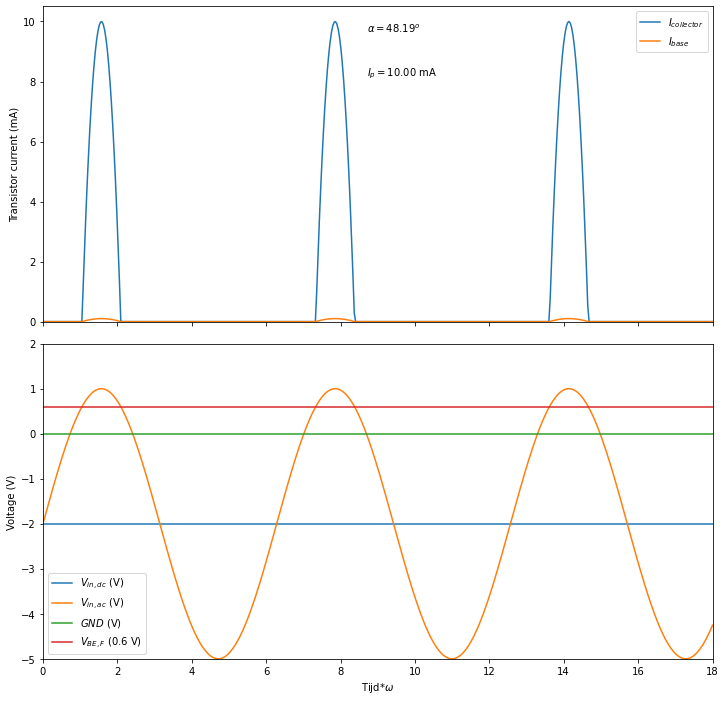

In [2]:
def stroominstelling(VDC,VAC,R,beta):
    t=np.linspace(0,18,500)
    v_ac=VDC+VAC*np.sin(t)
    v_dc=VDC+0*v_ac
    v_o=v_dc*0
    v_ref=0.6+v_o
    Ib=((v_ac-v_ref)>0)*(v_ac-v_ref)/R/1000
    Ic=beta*Ib
    Ipiek=(VDC+VAC-0.6)/R/1000*beta

    fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(12,12))
    fig.subplots_adjust(hspace=0.07)
    if Ipiek<0:
        plt.figtext(0.5,0.8,r"$I_{p}= 0 A$")
        ax1.plot(t,Ic,label="$I_{collector}$")
        ax1.plot(t,Ib,label="$I_{base}$")
        ax1.set_ylabel('Transistor current (A)')
    elif Ipiek>0.1:
        plt.figtext(0.5,0.8,r"$I_{p}= $"+'{:03.2f}'.format(Ipiek)+r" A")
        ax1.plot(t,Ic,label="$I_{collector}$")
        ax1.plot(t,Ib,label="$I_{base}$")
        ax1.set_ylabel('Transistor current (A)')
    else:    
        plt.figtext(0.5,0.8,r"$I_{p}= $"+'{:03.2f}'.format(Ipiek*1000)+r" mA")
        ax1.plot(t,Ic*1000,label="$I_{collector}$")
        ax1.plot(t,Ib*1000,label="$I_{base}$")
        ax1.set_ylabel('Transistor current (mA)')
    ax1.tick_params(labelsize = 10)
    ax1.set_ylim(0,)
    ax1.legend()
    if Ipiek>0:
        plt.figtext(0.5,0.85,r"$\alpha =$"+'{:.2f}'.format(np.arccos(-VDC/VAC)/np.pi*180)+r"$^o$")
   
    ax2.plot(t,v_dc, label="$V_{in,dc}$ (V)")    
    ax2.plot(t,v_ac, label="$V_{in,ac}$ (V)")    
    ax2.plot(t,v_o, label="$GND$ (V)")    
    ax2.plot(t,v_ref, label="$V_{BE,F}$ (0.6 V)")    
    ax2.set_xlabel('Tijd*$\omega$ ')
    ax2.tick_params(labelsize = 10)
    ax2.set_ylabel('Voltage (V)')
    ax2.set_ylim(VDC-VAC,VDC+VAC+1)
    ax2.set_xlim(0,18)
    ax2.legend()
    plt.show();
if usewidgets:
    VDCWidget=FloatSlider(value=-2, description=r'$V_{in,dc} (V)$', max=0, min=-10, step=0.1, continuous_update=False)
    VACWidget=FloatSlider(value=3, description=r'$V_{in,ac} (V)$', max=20, min=1, step=0.1, continuous_update=False)
    RWidget=FloatSlider(value= 5, description=r'$R_{in} (k\Omega)$', max=100, min=0.1, step=0.1, continuous_update=False)
    betaWidget=FloatSlider(value=100, description=r'$\beta_F$', max=1000, min=10, step=0.001, continuous_update=False)
    interact(stroominstelling, VDC= VDCWidget,VAC=VACWidget, R=RWidget, beta=betaWidget);
else:
    stroominstelling(-2,3,4,100);

De LRC kring is een parallel LRC kring. Een parallel LRC kring heeft de eigenschap dat hij een aangelegde gepulste stroomsignaal gaat omzetten in een sinusvormige spanning op de resonantiefrequentie. Aangezien de spanning over de belasting ($R_L$) dan sinusvormig is, gaat de stroom door de belasting ook sinusvormig zijn.

De overeenkomende SPICE code voor dit circuit is:


In [9]:
display.Code(filename="simul\classC.sp", language='spice') 

* Class C amp 1
Q_Q1         2 1 0 Q2
L_L1         2 3  1uH  
C_C1         2 3  10nF  
R_RL         2 3  60  
V_Vdd        3 0 11V
R_Rin        4 1 100
V_Vin        4 0 sin(-1.5 2.7 1591500) DC=-1.5
.model Q2  NPN(Is=14.34f BF=200)

```{code-block} spice
---
name: listing1
caption: basis Klasse C circuit
---
```

In de `.model` kaart zien we dat we voor de bipolaire transistor een model gebruiken dat we Q2 hebben genoemd. Dit zijn biploaire transistors waar we een $\beta_{Forward}$ hebben gelijk aan 200.

Het circuit waarbij we de knoopnummers een rood label gegeven hebben wordt dan:

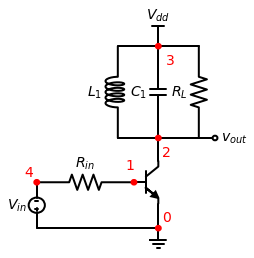

In [54]:
d = schem.Drawing()
T = d.add(e.BJT_NPN)
dot1 =d.add(e.DOT, xy=T.base,color='red')
dot1.add_label('1',  loc='center', ofst=[0,.3], align=('right','bottom'))
Ri = d.add(e.RES, d='left', label='$R_{in}$')
dot4 =d.add(e.DOT,color='red')
dot4.add_label('4', loc='center', ofst=[-.1,.1], align=('right','bottom'))
#d.labelI(Ri, 'input current')
Vi = d.add(e.SOURCE_V,d='down',label='$V_{in}$', zoom=0.5)
d.add(e.LINE,d='right',  tox=T.emitter)
dot0 =d.add(e.DOT,color='red')
dot0.add_label('0',  loc='center', ofst=[0.4,.1], align=('right','bottom'))
d.add(e.GND)
d.add(e.LINE,d='up',  toy=T.emitter)
d.add(e.LINE, xy=T.collector, d='up', l=0.75)
dot2 = d.add(e.DOT,color='red')
dot2.add_label('2', loc='center', ofst=[.4,-.7], align=('right','bottom'))
C1 = d.add(e.CAP, d='up', label='$C_1$')
d.add(e.LINE, xy=C1.start, d='left', l=1.25)
L1 = d.add(e.INDUCTOR2, d='up', label='$L_1$')
d.add(e.LINE, xy=C1.start, d='right', l=1.25)
R = d.add(e.RES, d='up', label='$R_L$')
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN, rgtlabel='$v_{out}$')
d.add(e.LINE,xy=R.end, d='left', tox=C1.end)
dot3 = d.add(e.DOT,color='red')
dot3.add_label('3',  loc='center', ofst=[.5,-.7], align=('right','bottom'))
d.add(e.LINE, d='right',xy=L1.end, tox=C1.end)
d.add(e.LINE, d='up',l=0.25)
d.add(e.VDD, label='$V_{dd}$')
d.draw()

Een spice simulatie van het bovenstaande circuit levert hetvolgende op:

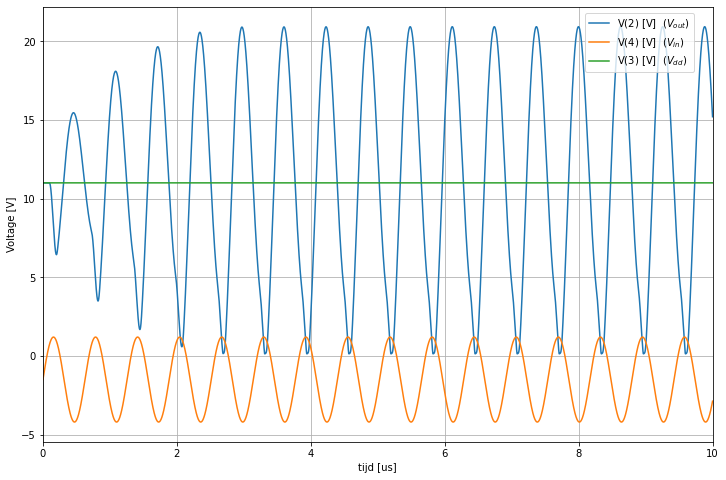

In [5]:
circuit=SpiceParser(path='simul\classC.sp').build_circuit()  
end_time=1e-5
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=2e-10, end_time=end_time)

figure, ax = plt.subplots(figsize=(12, 8))
ax.plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]  ($V_{out}$)')
ax.plot(analysis.time*1e6,analysis.nodes['4'],label='V(4) [V]  ($V_{in}$)' )
ax.plot(analysis.time*1e6,analysis.nodes['3'],label='V(3) [V]  ($V_{dd}$)' )
ax.legend( loc=(0.81,.85))
ax.grid()
ax.set_xlabel('tijd [us]')
ax.set_xlim(0,end_time*1e6)
ax.set_ylabel('Voltage [V]')
plt.show()

We merken op dat het ongeveer een 5-tal periodes duurt eer de een AC zwaai bekomen wordt die gelijk is aan de voedingsspanning (i.e. 11V). Dit aantal periodes is sterk afhankelijk van de gekozen trilkring.

We kunnen ook de collectorstroom plotten na dezelfde simulatie.

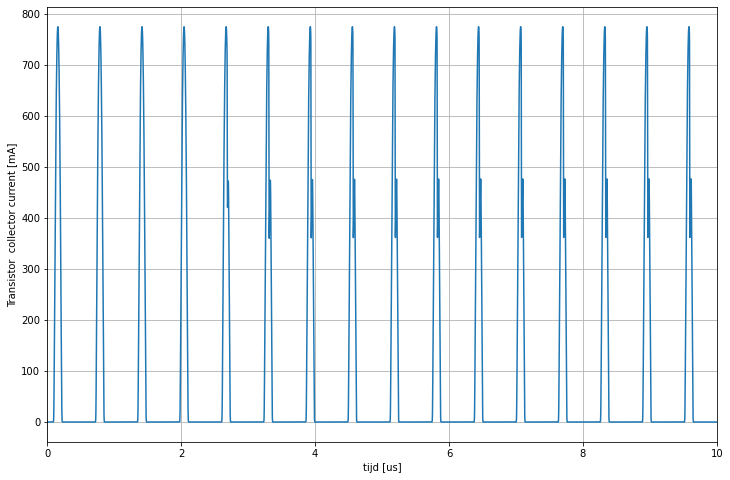

In [6]:
figure, ax = plt.subplots(figsize=(12, 8))
ax.plot(analysis.time*1e6,-analysis.branches['v_vdd']*1e3)   # kunnen we in de save ook niet IC(Q_Q1) opvragen
ax.grid()
ax.set_xlabel('tijd [us]')
ax.set_xlim(0,end_time*1e6)
ax.set_ylabel('Transistor  collector current [mA]')    
plt.show()

Dit circuit werd ontworpen voor een collector piekstroom van 600 mA. We merken op dat de collectorstromen bij het starten van de oscillatie eventjes boven de ontwerplimiet komen. Wanneer dit een probleem vormt moet de geleidingshoek groter gemaakt worden.
We merken ook op dat de stroom terug daalt wanneer de bipolaire transistor in verzadiging geraakt. Dit is ook logisch. Als de spanning tussen de collector en de emitter te klein wordt, kan er geen stroom meer lopen.

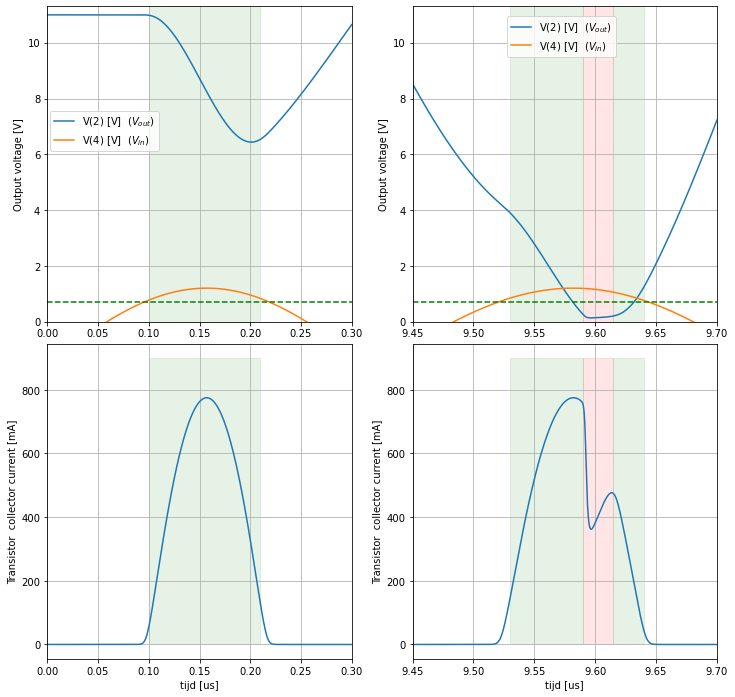

In [52]:
fig, ax = plt.subplots(2,2,figsize=(12,12))
fig.subplots_adjust(hspace=0.07)
ax[0,0].plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]  ($V_{out}$)')
ax[0,0].plot(analysis.time*1e6,analysis.nodes['4'],label='V(4) [V]  ($V_{in}$)' )
ax[0,0].legend( loc=(0.01,.54))
ax[0,0].grid()
ax[0,0].axhline(y=0.7, color='green',linestyle='--')
ax[0,0].set_xlim(0,0.3)
ax[0,0].set_ylim(0,11.3)
ax[0,0].set_ylabel('Output voltage [V]')
ax[0,0].fill_between(x=[0.1,0.21],y1=[12,12],color='green',alpha=0.1)
ax[1,0].fill_between(x=[0.1,0.21],y1=[900,900],color='green',alpha=0.1)
ax[1,0].plot(analysis.time*1e6,-analysis.branches['v_vdd']*1e3)
ax[1,0].grid()
ax[1,0].set_xlabel('tijd [us]')
ax[1,0].set_xlim(0,0.3)
ax[1,0].set_ylabel('Transistor  collector current [mA]')
ax[0,1].plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]  ($V_{out}$)')
ax[0,1].plot(analysis.time*1e6,analysis.nodes['4'],label='V(4) [V]  ($V_{in}$)' )
ax[0,1].legend( loc=(0.31,.84))
ax[0,1].grid()
ax[0,1].set_xlim(9.45,9.70)
ax[0,1].set_ylim(0,11.3)
ax[0,1].set_ylabel('Output voltage [V]')
ax[0,1].axhline(y=0.7, color='green',linestyle='--')
ax[1,1].plot(analysis.time*1e6,-analysis.branches['v_vdd']*1e3)
ax[1,1].grid()
ax[1,1].set_xlabel('tijd [us]')
ax[1,1].set_xlim(9.45,9.70)
ax[1,1].set_ylabel('Transistor  collector current [mA]')
ax[0,1].fill_between(x=[9.53,9.59],y1=[12,12],color='green',alpha=0.1)
ax[1,1].fill_between(x=[9.53,9.59],y1=[900,900],color='green',alpha=0.1)
ax[0,1].fill_between(x=[9.59,9.615],y1=[12,12],color='red',alpha=0.1)
ax[1,1].fill_between(x=[9.59,9.615],y1=[900,900],color='red',alpha=0.1)
ax[0,1].fill_between(x=[9.615,9.64],y1=[12,12],color='green',alpha=0.1)
ax[1,1].fill_between(x=[9.615,9.64],y1=[900,900],color='green',alpha=0.1)

plt.show()

We kunnen ook een [Lissajous figuur](https://en.wikipedia.org/wiki/Lissajous_curve) plotten van de uitgangsspanning ten opzichte van de ingangsspanning. We merken dat er een toenemend faseverschil is dat tijdens de periode dat de transistor in geleiding is terug weggewerkt wordt.

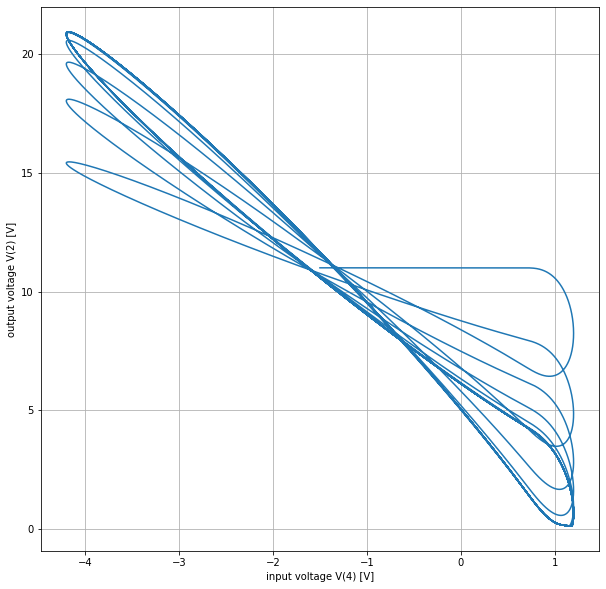

In [12]:
figure, ax = plt.subplots(figsize=(10, 10))
ax.plot(analysis.nodes['4'],analysis.nodes['2'])
ax.grid()
ax.set_xlabel('input voltage V(4) [V]')
ax.set_ylabel('output voltage V(2) [V]')
plt.show()

Wanneer we kijken naar het basis circuit van de klasse C versterker hebben we 2 elementen die 
voornamelijk bijdragen tot het bepalen van de oscillatiefrequentie, namelijk:
* $L_1$
* $C_1$

en 4 elementen die bijdragen to het optimaliseren van et bekomen vermogen, namelijk:
* De belastingsweerstand $R_L$
* De voedingsspanning $V_{dd}$
* De piekstroom van de transistor $I_p$
* Het gedeelte van de periode dat de transistor aangestuurd wordt : 2$\alpha$
    
In wat volgt zullen we eerst exploreren welke van de 4 bovenstaande parameters het bekomen vermogen bepalen. Vervolgens zullen we een methodologie uitwerken om de optimale parameters te selecteren. In het volgende deel gaan we dan verder met de selectie van $L_1$ en $C_1$

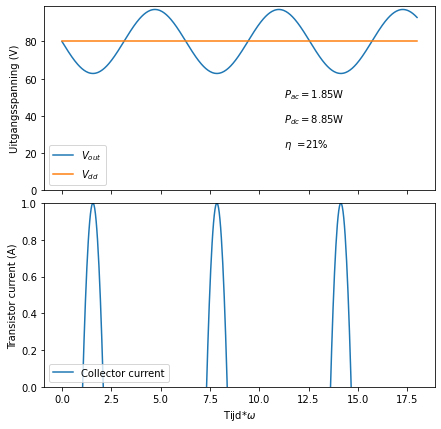

In [9]:
def func0(VDD,a,R,I):
    t=np.linspace(0,18,500)
    Ip=I/(1-np.cos(a*np.pi/180))
    pdc=Ip*VDD/np.pi*(np.sin(a*np.pi/180)-np.cos(a*np.pi/180)*(a*np.pi/180))
    Vx=Ip*R/2/np.pi*(2*(a*np.pi/180)-np.sin(2*(a*np.pi/180)))
    if Vx > VDD:
        Vx=VDD
    fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(7,7))
    fig.subplots_adjust(hspace=0.07)
    ax1.plot(t,VDD-Vx*np.sin(t),label="$V_{out}$")
    ax1.plot(t,VDD+t*0,label=r"$V_{dd}$") 
    ax1.tick_params(labelsize = 10)
    ax1.set_ylabel('Uitgangsspanning (V)')
    ax1.set_ylim(0,)
    ax1.legend()
    plt.figtext(0.6,0.7,r"$P_{ac}=$"+'{:.2f}'.format(Vx*Vx/2/R)+r"W")
    plt.figtext(0.6,0.65,r"$P_{dc}=$"+'{:.2f}'.format(pdc)+r"W")
    plt.figtext(0.6,0.6,r"$\eta$  ="+'{:.0f}'.format(Vx*Vx/2/R/pdc*100)+r"%")
    ax2.plot(t,-Ip*np.cos(a*np.pi/180)+Ip*np.sin(t), label="Collector current")    
    ax2.set_xlabel('Tijd*$\omega$ ')
    ax2.tick_params(labelsize = 10)
    ax2.set_ylabel('Transistor current (A)')
    ax2.set_ylim(0,I)
    ax2.legend()
    plt.show();
if usewidgets:
    VDDWidget=FloatSlider(value=80, description='$V_{dd} (V)$', max=100, min=1, step=0.1, continuous_update=False)
    aWidget=FloatSlider(value=30, description=r'$\alpha (^o)$', max=180, min=1, step=1, continuous_update=False)
    RWidget=FloatSlider(value= 80, description='$R_L ( \Omega)$', max=1000, min=1, step=1, continuous_update=False)
    IWidget=FloatSlider(value=1, description='$I_p  (A)$', max=3, min=0.01, step=0.001, continuous_update=False)
    interact(func0, VDD= VDDWidget,a=aWidget, R=RWidget, I=IWidget);
else:
    func0(80,30,80,1);

In de bovenstaande grafiek is de uitgangspanning  $V_{out}$ 


$$V_{out}(t)=V_{dd}-V_a \cos(\omega t) $$ (eq1)


en is de collector current van de transistor $I_c$

$$ I_c(t) = \left\{ \begin{matrix}
      \frac{\cos(\omega t)-\cos(\alpha)}{1-\cos(\alpha)}I_p  & wanneer & |\omega t| <\alpha \\  
                  0 & wanneer& | \omega t| >\alpha   
          \end{matrix} \right.$$ (eq2)
                 
Hoe we aan de waarde van $V_a$ komen, volgt in de afleiding hieronder.

Op basis van de hierboven gegeven stromen en spanningen kunnen we de verschillende vermogens uitrekenen  (met $u=\omega t$):
 

$$ P_{ac}  =   \frac{1}{2\pi}\int_{-\pi}^{\pi}{\frac {(V_a\sin(u))^2}{R_L} du } =  \frac {V_a^2}{2 R_L} $$ (eq3)
$$ P_{dc}   =   \frac{1}{2\pi}\int_{-\alpha}^{\alpha} { V_{dd}I_c(u) du } =   \frac{V_{dd} I_p}{\pi}\frac {\sin(\alpha)-\alpha\cos(\alpha)}{1-\cos(\alpha)} $$ (eq4)
$$ P_{T}   =   \frac{1}{2\pi}\int_{-\alpha}^{\alpha} { V_{out}(u)I_c(u) du } =  
  \frac{V_{dd} I_p}{\pi}\frac {\sin(\alpha)-\alpha\cos(\alpha)}{1-\cos(\alpha)}-
  \frac {I_p V_a}{4 \pi}\frac{(2\alpha-\sin(2\alpha))}{(1-\cos(\alpha))} $$ (eq5)


Nu is het totale DC vermogen ($P_{dc}$)de som van het in de transistor gedisipeerde vermogen ($P_{T}$) en het bekomen nuttige vermogen ($P_{ac}$):

$$ P_{ac} = P_{dc}-P_{T} $$  (eq6)

Op basis van vergelijkingen  {eq}`eq3`,{eq}`eq4` en {eq}`eq5` bekomen we:


$$ \frac {V_a^2}{2 R_L} =\frac{I_p V_a}{4 \pi} \frac {(2\alpha-\sin(2\alpha))}{(1-\cos(\alpha))}$$  (eq7)


De bekomen amplitude van oscillatie is:

$$ V_a= \frac{I_p R_L}{2 \pi} \frac{ 2 \alpha - \sin(2 \alpha)}{1-\cos(\alpha)} $$  (eq8)

Het is goed om voor al deze 4 parameters ook eens de instantane bekomen power en het instantane ingangsvermogen te bekijken. 

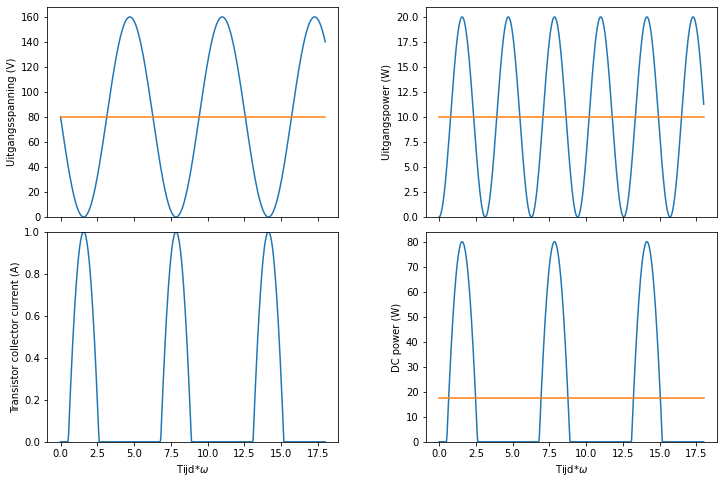

In [5]:
def func1(VDD,a,R,I):
    t=np.linspace(0,18,500)
    Ip=I/(1-np.cos(a*np.pi/180))
    pdc=Ip*VDD/np.pi*(np.sin(a*np.pi/180)-np.cos(a*np.pi/180)*(a*np.pi/180))
    Vx=Ip*R/2/np.pi*(2*(a*np.pi/180)-np.sin(2*(a*np.pi/180)))
    io=-Ip*np.cos(a*np.pi/180)+Ip*np.sin(t)
    io*=(io>0)
    if Vx > VDD:
        Vx=VDD
    fig, ax = plt.subplots(2,2,sharex=True,figsize=(12,8))
    fig.subplots_adjust(hspace=0.07)
    fig.subplots_adjust(wspace=0.3)
    ax[0,0].plot(t,VDD-Vx*np.sin(t))
    ax[0,0].plot(t,VDD+t*0) 
    ax[0,0].tick_params(labelsize = 10)
    ax[0,0].set_ylabel('Uitgangsspanning (V)')
    ax[0,0].set_ylim(0,)
    ax[1,0].plot(t,io)    
    ax[1,0].set_xlabel('Tijd*$\omega$ ')
    ax[1,0].tick_params(labelsize = 10)
    ax[1,0].set_ylabel('Transistor collector current (A)')
    ax[1,0].set_ylim(0,I)
    ax[0,1].plot(t,(Vx*np.sin(t))**2/R)
    ax[0,1].plot(t,Vx**2/2/R+t*0) 
    ax[0,1].tick_params(labelsize = 10)
    ax[0,1].set_ylabel('Uitgangspower (W)')
    ax[0,1].set_ylim(0,)
    ax[1,1].plot(t,io*VDD)
    ax[1,1].plot(t,pdc+t*0)
    ax[1,1].set_xlabel('Tijd*$\omega$ ')
    ax[1,1].tick_params(labelsize = 10)
    ax[1,1].set_ylabel('DC power (W)')
    ax[1,1].set_ylim(0,)
    #plt.text(2,1.1,r"$P_{ac}=$"+'{:.2f}'.format(Vx*Vx/2/R)+r"W,    $P_{dc}=$"+'{:.2f}'.format(pdc)+r"W,    $\eta$  ="+'{:.0f}'.format(Vx*Vx/2/R/pdc*100)+r"%")
    plt.show();
if usewidgets:
    VDDWidget=FloatSlider(value=80, description='$V_{dd} (V)$', max=100, min=1, step=0.1, continuous_update=False)
    aWidget=FloatSlider(value=60, description=r'$\alpha(deg)$', max=180, min=1, step=1, continuous_update=False)
    RWidget=FloatSlider(value= 320, description='$R_L ( \Omega)$', max=1000, min=1, step=1, continuous_update=False)
    IWidget=FloatSlider(value=1, description='$I_p  (A)$', max=3, min=0.01, step=0.001, continuous_update=False)
    interact(func1, VDD= VDDWidget,a=aWidget, R=RWidget, I=IWidget);
else:
    func1(80,60,320,1);

Vervolgens kijken we naar het instantane vermogenverlies in de transistor:

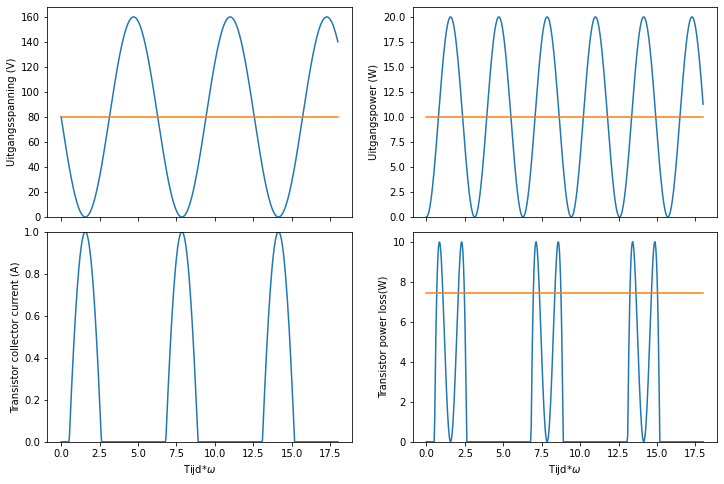

In [4]:
def func2(VDD,a,R,I):
    t=np.linspace(0,18,500)
    Ip=I/(1-np.cos(a*np.pi/180))
    pdc=Ip*VDD/np.pi*(np.sin(a*np.pi/180)-np.cos(a*np.pi/180)*(a*np.pi/180))
    Vx=Ip*R/2/np.pi*(2*(a*np.pi/180)-np.sin(2*(a*np.pi/180)))
    io=-Ip*np.cos(a*np.pi/180)+Ip*np.sin(t)
    io*=(io>0)
    if Vx > VDD:
        Vx=VDD
    fig, ax = plt.subplots(2,2,sharex=True,figsize=(12,8))
    fig.subplots_adjust(hspace=0.07)
    ax[0,0].plot(t,VDD-Vx*np.sin(t))
    ax[0,0].plot(t,VDD+t*0) 
    ax[0,0].tick_params(labelsize = 10)
    ax[0,0].set_ylabel('Uitgangsspanning (V)')
    ax[0,0].set_ylim(0,)
    ax[1,0].plot(t,io)    
    ax[1,0].set_xlabel('Tijd*$\omega$ ')
    ax[1,0].tick_params(labelsize = 10)
    ax[1,0].set_ylabel('Transistor collector current (A)')
    ax[1,0].set_ylim(0,I)
    ax[0,1].plot(t,(Vx*np.sin(t))**2/R)
    ax[0,1].plot(t,Vx**2/2/R+t*0) 
    ax[0,1].tick_params(labelsize = 10)
    ax[0,1].set_ylabel('Uitgangspower (W)')
    ax[0,1].set_ylim(0,)
    ax[1,1].plot(t,io*(VDD-Vx*np.sin(t)))
    ax[1,1].plot(t,pdc-Vx**2/2/R+t*0)
    ax[1,1].set_xlabel('Tijd*$\omega$ ')
    ax[1,1].tick_params(labelsize = 10)
    ax[1,1].set_ylabel('Transistor power loss(W)')
    ax[1,1].set_ylim(0,)
    #plt.text(2,1.1,r"$P_{ac}=$"+'{:.2f}'.format(Vx*Vx/2/R)+r"W,    $P_{dc}=$"+'{:.2f}'.format(pdc)+r"W,    $\eta$  ="+'{:.0f}'.format(Vx*Vx/2/R/pdc*100)+r"%")
    plt.show();
if usewidgets:
    VDDWidget=FloatSlider(value=80, description='$V_{dd} (V)$', max=100, min=1, step=0.1, continuous_update=False)
    aWidget=FloatSlider(value=60, description=r'$\alpha(deg)$', max=180, min=1, step=1, continuous_update=False)
    RWidget=FloatSlider(value= 320, description='$R_L ( \Omega)$', max=1000, min=1, step=1, continuous_update=False)
    IWidget=FloatSlider(value=1, description='$I_p  (A)$', max=3, min=0.01, step=0.001, continuous_update=False)
    interact(func2, VDD= VDDWidget,a=aWidget, R=RWidget, I=IWidget);
else:
    func2(80,60,320,1);

Voor het bepalen van het verlies in de transistor plotten we bij voorkeur de relatie tussen de spanning over de transistor en de stroom door de transistor.

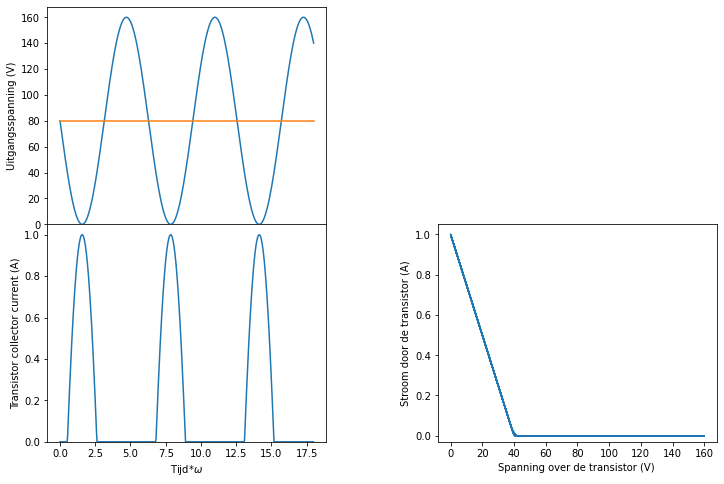

In [6]:
def func3(VDD,a,R,I):
    t=np.linspace(0,18,500)
    Ip=I/(1-np.cos(a*np.pi/180))
    pdc=Ip*VDD/np.pi*(np.sin(a*np.pi/180)-np.cos(a*np.pi/180)*(a*np.pi/180))
    Vx=Ip*R/2/np.pi*(2*(a*np.pi/180)-np.sin(2*(a*np.pi/180)))
    io=-Ip*np.cos(a*np.pi/180)+Ip*np.sin(t)
    io*=(io>0)
    if Vx > VDD:
        Vx=VDD
    fig, ax = plt.subplots(2,2,figsize=(12,8))
    fig.subplots_adjust(hspace=0,wspace=0.4)
    ax[0,0].plot(t,VDD-Vx*np.sin(t))
    ax[0,0].plot(t,VDD+t*0) 
    ax[0,0].tick_params(labelsize = 10)
    ax[0,0].set_ylabel('Uitgangsspanning (V)')
    ax[0,0].set_ylim(0,)
    ax[1,0].plot(t,io)    
    ax[1,0].set_xlabel('Tijd*$\omega$ ')
    ax[1,0].tick_params(labelsize = 10)
    ax[1,0].set_ylabel('Transistor collector current (A)')
    ax[1,0].set_ylim(0,I*1.05)
    ax[1,1].plot(VDD-Vx*np.sin(t),io)
    ax[1,1].set_xlabel('Spanning over de transistor (V) ')
    ax[1,1].tick_params(labelsize = 10)
    ax[1,1].set_ylabel('Stroom door de transistor (A)')
    ax[1,1].set_ylim(-.03,)
    ax[0, 1].remove()
    #plt.text(2,1.1,r"$P_{ac}=$"+'{:.2f}'.format(Vx*Vx/2/R)+r"W,    $P_{dc}=$"+'{:.2f}'.format(pdc)+r"W,    $\eta$  ="+'{:.0f}'.format(Vx*Vx/2/R/pdc*100)+r"%")
    plt.show();
if usewidgets:
    VDDWidget=FloatSlider(value=80, description='$V_{dd} (V)$', max=100, min=1, step=0.1, continuous_update=False)
    aWidget=FloatSlider(value=60, description=r'$\alpha(deg)$', max=180, min=1, step=1, continuous_update=False)
    RWidget=FloatSlider(value= 320, description='$R_L ( \Omega)$', max=1000, min=1, step=1, continuous_update=False)
    IWidget=FloatSlider(value=1, description='$I_p  (A)$', max=3, min=0.01, step=0.001, continuous_update=False)
    interact(func3, VDD= VDDWidget,a=aWidget, R=RWidget, I=IWidget);
else:
    func3(80,60,320,1);

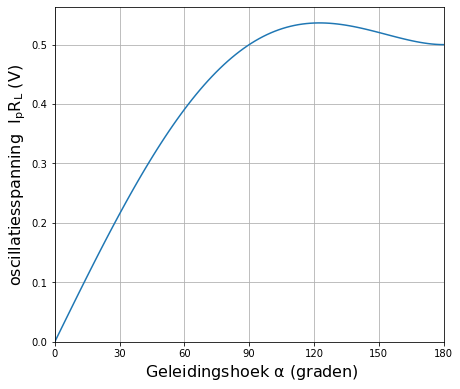

In [8]:
import matplotlib.ticker as ticker
fig, ax1 = plt.subplots(figsize=(6,6))
a=np.linspace(0.1,180,100)
ax1.plot(a,(2*(a*np.pi/180)-np.sin(2*(a*np.pi/180)))/2/np.pi/(1-np.cos(a*np.pi/180)))
ax1.tick_params(labelsize = 10)
ax1.set_ylabel('oscillatiesspanning  $I_p R_L$ (V)')
ax1.set_ylim(0,)
ax1.set_xlim(0,180)
ax1.set_xlabel(r' Geleidingshoek $\alpha$ (graden)')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax1.grid(True)
plt.show();

opmerking:

* De grafiek in deze jupyter notebook geeft de maximale oscillatiespanning $V_{max}$ weer die bekomen wordt in de resonante kring in functie van de geleidingshoek ($\alpha$) ten opzichte van het product van de piekstroom $I_p$ en de weerstand $R_L$.  Dus de plot geeft dus de waarde van $u= \frac{V_{max}}{I_p R_L}$ 

* De grafiek in de powerpoint slides van de les geeft het maximale vermogen $P_{max}$ dat bekomen wordt in functie van de geleidingshoek ten opzichte van het product van de piekstroom Ip en de voedingspanning.  $P_{max} =\frac{V_{max} I_{max}}{2}$. Dus de plot is  $w=\frac{P_{max}}{V_{DD} I_p} = \frac{\frac{V_{max}*I_{max}}{2}}{V_{DD} I_p} = \frac{V_{max} \frac{Vmax}{2 R_L}}{Vdd I_p}$.   Bovendien weten we dat $V_{max}< V_{DD}$ en in het beste geval (= verzadiging) $V_{max}$ gelijk wordt aan $V_{DD}$.  Dus bij verzadiging geldt   $w=\frac{Vmax}{2 R_L I_p}$

In de meeste gevallen willen we $V_{DD}$ als oscillatie amplitude. Daarom zullen we $I_p$ kiezen als:

$$ I_{p,max}= 2 \pi \frac{V_{DD} }{R_L} \frac{1-\cos(\alpha)}{ 2 \alpha - \sin(2 \alpha)}$$

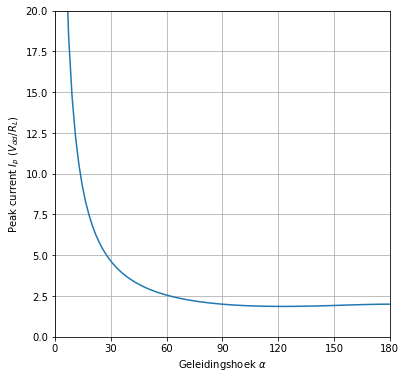

In [4]:
import matplotlib.ticker as ticker
fig, ax1 = plt.subplots(figsize=(6,6))
a=np.linspace(0.1,180,100)
ax1.plot(a,2*np.pi*(1-np.cos(a*np.pi/180))/(2*(a*np.pi/180)-np.sin(2*(a*np.pi/180))))
ax1.tick_params(labelsize = 10)
ax1.set_ylabel('Peak current $I_p$ $(V_{dd}/R_L)$')
ax1.set_ylim(0,20)
ax1.set_xlim(0,180)
ax1.set_xlabel(r'Geleidingshoek $\alpha$ ')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax1.grid(True)
plt.show();

$$P_{ac}=I_p^2 R_L \frac{(2 \alpha-\sin (2 \alpha))^2}{8 \pi ^2 (1-\cos (\alpha))^2}$$

$$P_{dc}=\frac{V_{dd} I_p}{\pi}\frac {\sin(\alpha)-\alpha\cos(\alpha)}{1-\cos(\alpha)}$$

Het rendement wordt dan, rekening houdende met dat $I_p$ niet groter mag worden dan $I_{P,max}$

$$ \eta=\frac{I_p R_L}{V_{dd}}\frac{(2 \alpha-\sin (2 \alpha))^2}{8  \pi (1-\cos (\alpha)) (\sin (\alpha)-\alpha \cos (\alpha))} $$

### Maximale uitsturing

Omdat we het maximale rendement gaan bekomen bij maximale uitsturing kunnen we voor $I_p$ de bekomen waarde van $I_{p,max}$ invullen:


$$ \eta=\frac{2 \alpha-\sin (2 \alpha)}{4   (\sin (\alpha)-a \cos (\alpha))} $$


En als bekomen vermogen bekomen we:

$$ P_{ac,max}(\alpha)= \frac{V_{dd}^2 }{2 R_L}  $$

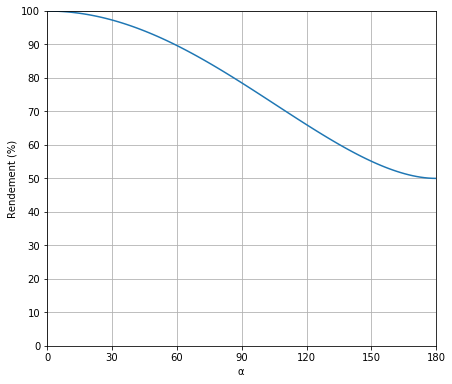

In [4]:
import matplotlib.ticker as ticker
fig, ax1 = plt.subplots(figsize=(6,6))
a=np.linspace(0.1,180,100)
m1=2*(a*np.pi/180)-np.sin(2*(a*np.pi/180))
m2=1-np.cos(a*np.pi/180)
m3=np.sin(a*np.pi/180)-(a*np.pi/180)*np.cos(a*np.pi/180)
ax1.plot(a,m1/4/m3*100)
ax1.tick_params(labelsize = 10)
ax1.set_ylabel('Rendement (%)')
ax1.set_ylim(0,100)
ax1.set_xlim(0,180)
ax1.set_xlabel(r'$\alpha$ ')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.grid(True)
plt.show();

```{exercise} Keuze van de geleidingshoek
:class: dropdown

Een belasting met een weerstand van 60 Ohm wensen we te gebruiken om 1 W over te brengen op 1.591 MHz, aan de hand van een vermogentransistor met een maximale stroom van  660 mA
Kies geschikte waardes voor de capaciteit $C_1$, de inductantie $L_1$, de voedingsspanning $V_{DD}$ en de hoek $\alpha$.
Hoe groot is het rendement?
Wat kiezen we als de maximale stroom van de transistor 360 mA is? 
```

## De LRC kring als functie van de frequentie

De klasse C versterker legt stroompulsen aan over een RLC parallel-kring. Als gevolg hiervan worden sinusvormige spanningen bekomen. Hiervoor splitsen we de aangelegde stroompulsen op in al zijn frequentiecomponenten en voor elke component bepalen we dan de overeenkomende spanning aan de hand van de impedantie $Z(\omega)$: $ V(\omega)=Z(\omega)* I(\omega)$. De formule voor $Z(\omega)$ is:

$$ Z(\omega)=\frac{1}{j \omega C+\frac{1}{R_L}+\frac{1}{j \omega L}}  $$

De onderstaande figuur toont $Z(\omega)$ als functie van de frequentie. L en C bepalen de frequentie. Er is een kleine invloed van $R_L$ op de frequentie. De invloed van $R_L$ op de bandbreedte en op hoe snel de trilling uitdempt is echter veel groter.

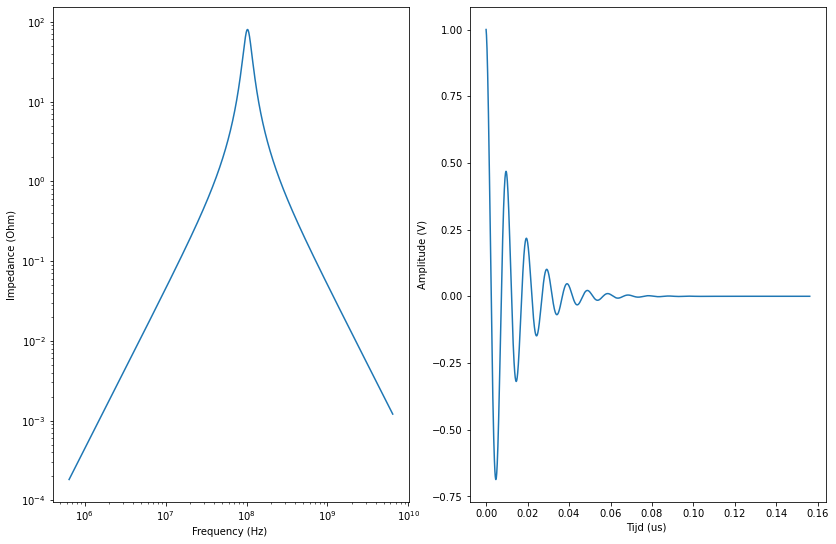

In [7]:
def func4(CC,LL,R,a):
    C=CC*1e-12
    L=LL*1e-9
    bb=1/(2*R*C)
    wc=np.sqrt(1/(C*L)-bb**2)
    w=np.linspace(wc/1000,wc*10,25000)
    z=np.real(1/(1.0j*C*w*2*np.pi+1/R+1/(1.0j*L*w*2*np.pi)))
    t=np.linspace(0,100/wc,2500)
        
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,8))
    fig.tight_layout(pad=3.0)
    ax1.plot(w,z)
    ax1.tick_params(labelsize = 10)
    ax1.set_ylabel('Impedance (Ohm)',size = 10)
    ax1.set_xlabel('Frequency (Hz) ',size = 10)
    ax1.set_xscale('log')
    ax1.set_yscale('log')

    ax2.plot(t*1e6,np.cos(wc*t)*np.exp(-bb*t))    
    ax2.set_xlabel('Tijd (us) ',size = 10)
    ax2.tick_params(labelsize = 10)
    ax2.set_ylabel('Amplitude (V)',size = 10)

    plt.show();
if usewidgets:
    CWidget=FloatSlider(value=80, description='$C (pF)$', max=100, min=1, step=0.1, continuous_update=False)
    LWidget=FloatSlider(value=30, description=r'$L (nH)$', max=180, min=1, step=1, continuous_update=False)
    RWidget=FloatSlider(value= 80, description='$R_L ( Ohm)$', max=1000, min=1, step=1, continuous_update=False)
    aWidget=FloatSlider(value=30, description=r'$\alpha(deg)$', max=180, min=1, step=1, continuous_update=False)
    interact(func4, CC= CWidget,LL=LWidget, R=RWidget, a=aWidget);
else:
    func4(80,30,80,30);

Het is ook zinvol om een simulatie te doen van de amplitude van het signaal als functie van de frequentie van de aansturing.
Op het eerste zicht lijkt het `.ac` commando in SPICE hier de aangeweze methode. Dit is echter niet het geval. Het `.ac` commando in SPICE doet een klein signaal simulatie, en hierbij wordt aangenomen dat een volledig sinusvormig signaal zich doorheen het circuit beweegt van de ingang naar de uitgang. Dat is voor een klasse C versterker zeker niet het geval. Eigenlijk is het enige werkingsregime waar we een kleinsignaalsimulatie zouden kunnen uitvoeren het instelpunt waarbij $\alpha=\pi$, met andere woorden de klasse-A modus.

In [2]:
display.Code(data=None, url=None, filename='simul\classC_ac.sp', language='spice')

* Class C amp 1
Q_Q1         2 1 0 Q2
L_L1         2 3  1uH  
C_C1         2 3  10n  
R_RL         2 3  60  
V_Vdd        3 0 11V
R_Rin        4 1 100
V_Vin        4 5  AC 0.5V 0 DC 0
V_VinDC      5 0 0.7V
.model Q2  NPN(Is=14.34f BF=200)

```{code-block} spice
---
name: listing2
caption: Klasse C voor AC simulatie
---

```

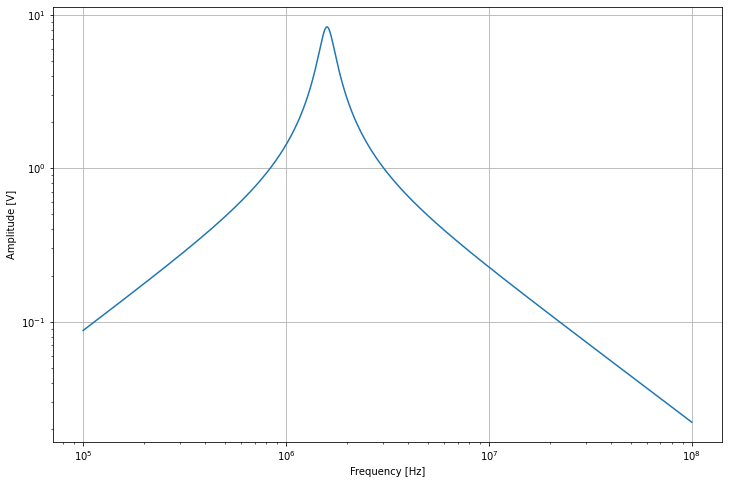

In [8]:
circuit=SpiceParser(path='simul\classC_ac.sp').build_circuit()  
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.ac(variation='dec',number_of_points=500,start_frequency=1e5, stop_frequency=1e8)

figure, ax = plt.subplots(figsize=(12, 8))
ax.plot(analysis.frequency, abs(analysis.nodes['2']))
ax.grid()
ax.set_xlabel('Frequency [Hz]')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Amplitude [V]')
plt.show()

Het is duidelijk uit de bovenstaande figuur dat de amplitude respons van een klasse C versterker is heel gelijkaardig aan de berekende impedantie $Z(\omega)$  van de trilkring. Dit is ook logisch aangezien 

$ V(\omega)=Z(\omega)* I(\omega)$

en de stroompuls $I(\omega)$ hetzelfde blijft wanneer de freqentie hetzelfde bij alle frequenties.

### Alternatieve berekening van $V_a$

In vergelijking {eq}`eq8` werd $V_a$ berekend op basis van een vermogenevenwicht, namelijk het totale vermogen dat in de trilkring gaat, is ook het totale vermogen dat in de belasting wordt bekomen. Hierbij werd echter verondersteld dat alle vermogen in de eerste harmonische van de trilkring terechtkomt. Dat hoeft natuurlijk niet helemaal het geval te zijn. Een alternatieve berekening voor $V_a$ is het opsplitsen van de aangelegde stroompulsen in een fourier reeks en elk van de sinusfucties die dan bekomen wordt leggen we dan aan aan de LRC kring. Hierdoor krijgen we de amplitude van alle harmonischen $V_{a,n}$. Het is natuurlijk wel zo dat de impedantie van de LRC kring off-resonance groot is (zie bovenstaande grafiek), wat maakt dat $V_{a,n}$ voor $ n > 1$ klein zal zijn.

$$ V_{a,1}= \frac{R_L}{\pi} \int_{-\pi}^{\pi} {\cos(u) I_c(u) du }= 
            \frac{R_L}{\pi} \int_{-\alpha}^{\alpha} {\cos(u) \frac{\cos(u)-\cos(\alpha)}{1-\cos(\alpha)}I_p  du }=
            \frac{I_p R_L}{2\pi}\frac {2 \alpha -\sin(2 \alpha)}{1-\cos(\alpha)} $$
            
### Berekening van de harmonische componenten
            
$$ V_{a,n}= \frac{Z_L(n \omega_c)}{\pi} \int_{-\pi}^{\pi} {\cos(n u) I_c(u) du }$$

$$ V_{a,n}= \frac{Z_L(n \omega_c)}{\pi} \int_{-\alpha}^{\alpha} {\cos(n u) \frac{\cos(u)-\cos(\alpha)}{1-\cos(\alpha)}I_p  du }$$

$$ V_{a,n}=\frac{2 I_p Z_L(n \omega_c)}{\pi} \frac{ \cos (\alpha) \sin ( n \alpha)-n \sin (\alpha) \cos (n \alpha)}{n(n^2-1)(1-\cos(\alpha))}$$
    

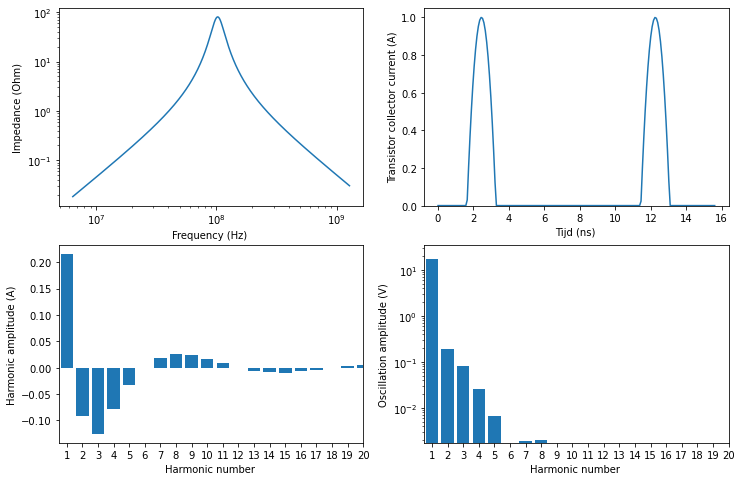

In [10]:
def func5(CC,LL,R,a):
    C=CC*1e-12
    L=LL*1e-9
    bb=1/(2*R*C)
    wc2=np.sqrt(1/(C*L))
    wc=np.sqrt(1/(C*L)-bb**2)
    w=np.linspace(wc/100,wc*2,2500)
    z=np.real(1/(1.0j*C*w*2*np.pi+1/R+1/(1.0j*L*w*2*np.pi)))
    t=np.linspace(0,10/wc,200)
    io=(-np.cos(a*np.pi/180)+np.sin(t*wc))/(1-np.cos(a*np.pi/180))
    io*=(io>0)  
    nn=np.linspace(1,20,20)
    ii=5*nn
    ii[0]=(2*(a*np.pi/180)-np.sin(2*(a*np.pi/180)))/2/np.pi/(1-np.cos(a*np.pi/180))
    ii[1:]=2/np.pi*(np.cos(a*np.pi/180)*np.sin(nn[1:]*a*np.pi/180)-nn[1:]*np.sin(a*np.pi/180)*np.sin(nn[1:]*a*np.pi/180))/nn[1:]/(nn[1:]**2-1)/(1-np.cos(a*np.pi/180))
    van=np.real(1/(1.0j*C*wc2*nn+1/R+1/(1.0j*L*wc2*nn)))*ii
    fig, ax = plt.subplots(2,2,figsize=(12,8))
    
    ax[0,0].plot(w,z)
    ax[0,0].tick_params(labelsize = 10)
    ax[0,0].set_ylabel('Impedance (Ohm)',size = 10)
    ax[0,0].set_xlabel('Frequency (Hz) ',size = 10)
    ax[0,0].set_xscale('log')
    ax[0,0].set_yscale('log')
    
    ax[0,1].plot(t*1e9,io)    
    ax[0,1].set_xlabel('Tijd (ns) ')
    ax[0,1].tick_params(labelsize = 10)
    ax[0,1].set_ylabel('Transistor collector current (A)')
    ax[0,1].set_ylim(0,1.05)
    
    ax[1,0].bar(nn,ii)
    ax[1,0].tick_params(labelsize = 10)
    ax[1,0].set_xlim(0.5,20)
    ax[1,0].xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax[1,0].set_xlabel('Harmonic number ',size = 10)
    ax[1,0].set_ylabel('Harmonic amplitude (A)',size = 10)
    
    ax[1,1].bar(nn,np.abs(van))
    ax[1,1].tick_params(labelsize = 10)
    ax[1,1].set_xlim(0.5,20)
    ax[1,1].set_ylim(np.abs(van[0])/10000,2*np.abs(van[0]))
    ax[1,1].xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax[1,1].set_yscale('log')
    ax[1,1].set_xlabel('Harmonic number ',size = 10)
    ax[1,1].set_ylabel('Oscillation amplitude (V)',size = 10)
    plt.show();
if usewidgets:
    CWidget=FloatSlider(value=80, description='$C (pF)$', max=100, min=1, step=0.1, continuous_update=False)
    LWidget=FloatSlider(value=30, description=r'$L (nH)$', max=180, min=1, step=1, continuous_update=False)
    RWidget=FloatSlider(value= 80, description='$R_L ( Ohm)$', max=1000, min=1, step=1, continuous_update=False)
    aWidget=FloatSlider(value=30, description=r'$\alpha(deg)$', max=180, min=1, step=1, continuous_update=False)
    interact(func5, CC= CWidget,LL=LWidget, R=RWidget, a=aWidget);
else:
    func5(80,30,80,30);

We merken op dat wanneer $\alpha = 90^o$, we dan geen even harmonischen krijgen. Dat is hetzelfde als bij de klasse B. Ook het rendement is gelijkaardig als de klasse B. Het gebrek aan even harmonischen is relevant voor een aantal toepassingen.

### FM modulatie

We kunnen ook dezelfde berekeningsmethode gebruiken om de effecten van off-resonant aan te sturen uit te rekenen, bijvoorbeeld in geval van FM modulatie.

### Andere aanstuurvormen dan een sinus:   blokgolf en driehoek

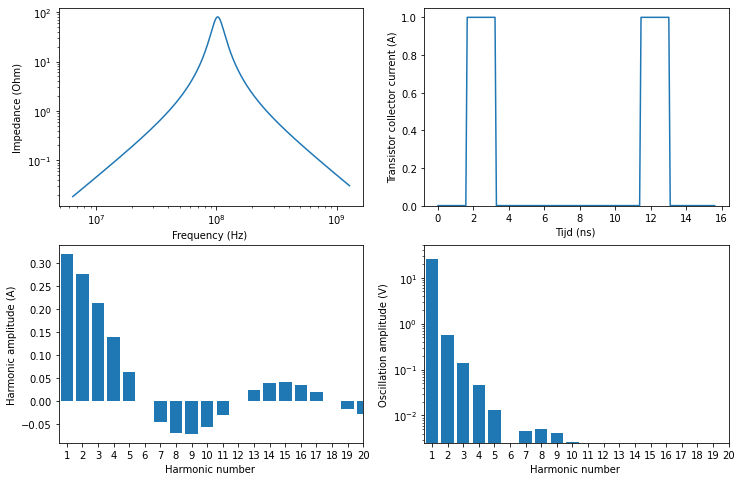

In [11]:
def func6(CC,LL,R,a):
    C=CC*1e-12
    L=LL*1e-9
    bb=1/(2*R*C)
    wc2=np.sqrt(1/(C*L))
    wc=np.sqrt(1/(C*L)-bb**2)
    w=np.linspace(wc/100,wc*2,2500)
    z=np.real(1/(1.0j*C*w*2*np.pi+1/R+1/(1.0j*L*w*2*np.pi)))
    t=np.linspace(0,10/wc,200)
    io=(-np.cos(a*np.pi/180)+np.sin(t*wc))/(1-np.cos(a*np.pi/180))
    io=(io>0)  
    nn=np.linspace(1,20,20)
    ii=2/(nn*np.pi)*np.sin(np.pi*nn*a/180)
    van=np.real(1/(1.0j*C*wc2*nn+1/R+1/(1.0j*L*wc2*nn)))*ii
    fig, ax = plt.subplots(2,2,figsize=(12,8))
    
    ax[0,0].plot(w,z)
    ax[0,0].tick_params(labelsize = 10)
    ax[0,0].set_ylabel('Impedance (Ohm)',size = 10)
    ax[0,0].set_xlabel('Frequency (Hz) ',size = 10)
    ax[0,0].set_xscale('log')
    ax[0,0].set_yscale('log')
    
    ax[0,1].plot(t*1e9,io)    
    ax[0,1].tick_params(labelsize = 10)
    ax[0,1].set_xlabel('Tijd (ns) ',size = 10)
    ax[0,1].set_ylabel('Transistor collector current (A)',size = 10)
    ax[0,1].set_ylim(0,1.05)
    
    ax[1,0].bar(nn,ii)
    ax[1,0].tick_params(labelsize = 10)
    ax[1,0].set_xlim(0.5,20)
    ax[1,0].xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax[1,0].set_xlabel('Harmonic number ',size = 10)
    ax[1,0].set_ylabel('Harmonic amplitude (A)',size = 10)
    
    ax[1,1].bar(nn,np.abs(van))
    ax[1,1].tick_params(labelsize = 10)
    ax[1,1].set_xlim(0.5,20)
    ax[1,1].set_ylim(np.abs(van[0])/10000,2*np.abs(van[0]))
    ax[1,1].xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax[1,1].set_yscale('log')
    ax[1,1].set_xlabel('Harmonic number ',size = 10)
    ax[1,1].set_ylabel('Oscillation amplitude (V)',size = 10)
    plt.show();
if usewidgets:
    CWidget=FloatSlider(value=80, description='$C (pF)$', max=100, min=1, step=0.1, continuous_update=False)
    LWidget=FloatSlider(value=30, description=r'$L (nH)$', max=180, min=1, step=1, continuous_update=False)
    RWidget=FloatSlider(value= 80, description='$R_L ( Ohm)$', max=1000, min=1, step=1, continuous_update=False)
    aWidget=FloatSlider(value=30, description=r'$\alpha(deg)$', max=180, min=1, step=1, continuous_update=False)
    interact(func6, CC= CWidget,LL=LWidget, R=RWidget, a=aWidget);
else:
    func6(80,30,80,30);

## Alternatieve schema's van de klasse C versterker.

### Gebruik makende van een transformator

Een van de belangrijke issues met betrekking van het basisschema van de klasse C versterkers is dat de reference van het outputsignaal is de voedingsspanning in plaats van de grond. 
Een van de opties om de reference van de voeding naar de grond te brengen, is het vervangen van de het spoel door een transformator, want hierdoor kunnen we de referenctiespanning verleggen naar de grond. De figuur hieronder geeft aan hoe dit kan gerealiseerd worden. 


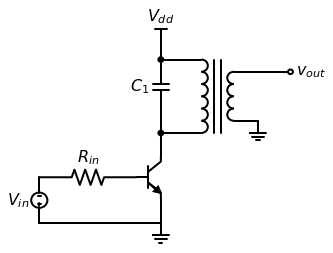

In [16]:
d = schem.Drawing()
T = d.add(e.BJT_NPN)
Ri = d.add(e.RES, d='left', xy=T.base, label='$R_{in}$')
Vi = d.add(e.SOURCE_V,d='down',label='$V_{in}$', zoom=0.5)
d.add(e.LINE,d='right',  tox=T.emitter)
d.add(e.GND)
d.add(e.LINE,d='up',  toy=T.emitter)
d.add(e.LINE, xy=T.collector, d='up', l=0.75)
d.add(e.DOT)
C1 = d.add(e.CAP, d='up', label='$C_1$')
d.add(e.LINE, xy=C1.start, d='right', l=1.25)
xf = d.add(e.transformer(t1=6, t2=4, loop=False))
d.add(e.LINE, xy=xf.p1, l=1.25, d='left')
d.add(e.DOT)
d.add(e.LINE, xy=xf.s1, l=1.75,d='right' )
dot=d.add(e.DOT_OPEN, rgtlabel='$v_{out}$')
d.add(e.LINE, xy=xf.s2, l=0.75)
d.add(e.GND)

d.add(e.VDD, label='$V_{dd}$',xy=C1.end)
d.draw()

### Gebruik makende van een LC kring aan de ingang
Dit heeft als voordeel dat er geen resitieve verliezen zijn de de $R_{in}$ weerstand aan de ingang.

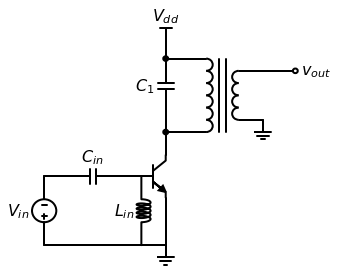

In [15]:
d = schem.Drawing()
T = d.add(e.BJT_NPN)
Ci = d.add(e.CAP, d='left', xy=T.base, label='$C_{in}$')
Li = d.add(e.INDUCTOR2, d='down', xy=T.base, label='$L_{in}$', zoom=0.75)
Vi = d.add(e.SOURCE_V,xy=Ci.end,d='down',label='$V_{in}$', zoom=0.75)
d.add(e.LINE,d='right',  tox=T.emitter)
d.add(e.GND)
d.add(e.LINE,d='up',  toy=T.emitter)
d.add(e.LINE, xy=T.collector, d='up', l=0.75)
d.add(e.DOT)
C1 = d.add(e.CAP, d='up', label='$C_1$')
d.add(e.LINE, xy=C1.start, d='right', l=1.25)
xf = d.add(e.transformer(t1=6, t2=4, loop=False))
d.add(e.LINE, xy=xf.p1, l=1.25, d='left')
d.add(e.DOT)
d.add(e.LINE, xy=xf.s1, l=1.75,d='right' )
dot=d.add(e.DOT_OPEN, rgtlabel='$v_{out}$')
d.add(e.LINE, xy=xf.s2, l=0.75)
d.add(e.GND)

d.add(e.VDD, label='$V_{dd}$',xy=C1.end)
d.draw()

### Uitgangsspanning oscillatie rond de grond
Voor een aantal toepassingen is het niet goed dat de AC uitgangspanning een DC offset heeft. We kunnen dit oplossen door het gebuik van de transformator (zie boven) maar ook aan de hand van een extra spoel $L_2$ en condensator $C_2$. Het is belangrijk dat de resonantiefrequentie die bepaald wordt door $L_2$ en $C_2$ _minstens_ een factor 10 lager is dan de resonantiefrequentie van de versterker.

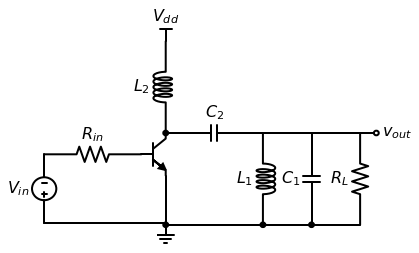

In [17]:
d = schem.Drawing()
T = d.add(e.BJT_NPN)
Ri = d.add(e.RES, d='left', xy=T.base, label='$R_{in}$')
#d.labelI(Ri, 'input current')
Vi = d.add(e.SOURCE_V,d='down',label='$V_{in}$',zoom=0.75)
d.add(e.LINE,d='right',  tox=T.emitter)
d.add(e.GND)
d.add(e.LINE,d='up',  toy=T.emitter)
d.add(e.DOT, xy=T.collector)
L2 = d.add(e.INDUCTOR2, d='up', label='$L_2$')
d.add(e.VDD, label='$V_{dd}$')
C2 = d.add(e.CAP, xy=T.collector, d='right', label='$C_2$')
L1 = d.add(e.INDUCTOR2, d='down', label='$L_1$')
d.add(e.LINE, xy=L1.start, d='right', l=1.5)
C1 = d.add(e.CAP, d='down', label='$C_1$')
d.add(e.LINE, xy=C1.start, d='right', l=1.5)
R = d.add(e.RES, d='down', label='$R_L$')
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN, rgtlabel='$v_{out}$')
d.add(e.LINE,xy=R.end, d='left', tox=C1.end)
d.add(e.DOT)
d.add(e.LINE, d='left',xy=C1.end, tox=L1.end)
d.add(e.DOT)
d.add(e.LINE, xy=L1.end,  tox=T.emitter, d='left')
d.add(e.DOT)
d.draw()

Wanneer we het bovenstaand circuit simuleren in spice, krijgen we hetvolgende resultaat.

In [3]:
display.Code(data=None, url=None, filename='simul\classC2.sp', language='spice')

* klasseC   versie2
Q_Q1         2 1 0  Q2
L_L1         0 3    1uH  
C_C1         0 3    10n  
R_R1         0 3    100  
V_V3         4 0    11V
V_V5         1 0    sin(-2 3.09 1591500) DC=-2
C_C2         2 3    100n  
L_L2         2 4    20uH
.model Q2  NPN(Is=14.34f BF=255.9 Rb=100 )

```{code-block} spice
---
name: listing3
caption: Basisschema van de klasse C versterker waarbij de uitgangspanning oscilleert rond de grond
---

```

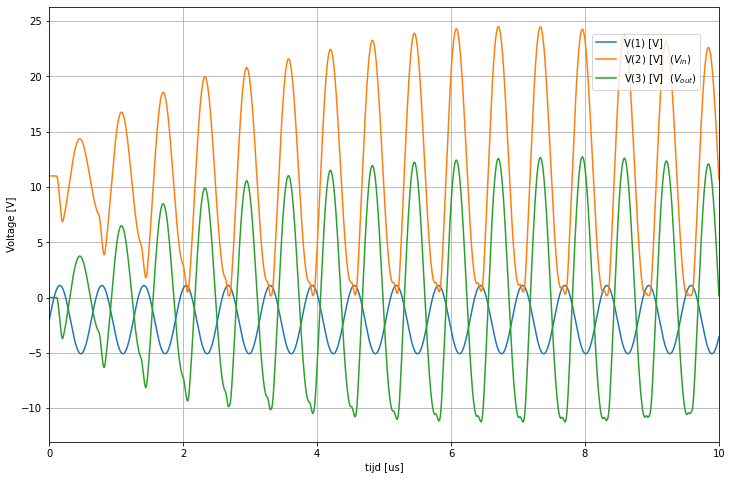

In [8]:
circuit=SpiceParser(path='simul\classC2.sp').build_circuit()  
end_time=1e-5
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=2e-10, end_time=end_time)

figure, ax = plt.subplots(figsize=(12, 8))
ax.plot(analysis.time*1e6,analysis.nodes['1'],label='V(1) [V]')
ax.plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]  ($V_{in}$)' )
ax.plot(analysis.time*1e6,analysis.nodes['3'],label='V(3) [V]  ($V_{out}$)' )
ax.legend( loc=(0.81,.81))
ax.grid()
ax.set_xlabel('tijd [us]')
ax.set_xlim(0,end_time*1e6)
ax.set_ylabel('Voltage [V]')
plt.show()

### Meerdere versterkingstrappen

In praktijk is het vaak zo dat een klasse C versterker gebruikt wordt om een klein ingangssignaal om te zetten naar een uitgangssignaal dat veel vermogen aan de belasting kan leveren. Vaak is echter een versterkertrap niet voldoende om van het klein ingangssignaal naar het groot uitgangssignaal te gaan, zowel in spanning als in stroom. Om dit te bekomen maken we meestal gebruik van meerdere versterkertrappen.

Hieronder bouwen we stap voor stap op van het hierboven besproken schema naar een schema met 3 klasse C versterkerstrappen. Dit schema met 3 versterkerstrappen sluit aan bij een schema dat gebruikt wordt voor mobiele communicatie.

#### Versterker met 2 Klasse C trappen: stap 1

We vertrekken van het schema van de klasse C versterker zoals gegeven in {numref}`cfig1`. We laten in dit schema de belasting $R_L$ voorlopig eventjes weg. De vergelijking die we hierboven gebruikt hebben om de stroom naar $C_1$ uit te rekenen is $I_C= C \frac{d V}{dt}$. We merken op dat deze stroom $I_C$ niet verandert als we een extra DC spanning over $C_1$ zetten. We kunnen het schema in {numref}`cfig1` dus aanpassen met een extra spanning over de condensator $C_1$. Dit levert ons het schema op in {numref}`cfig22`.

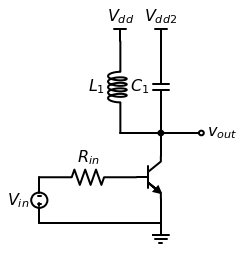

In [24]:
d = schem.Drawing()
T = d.add(e.BJT_NPN)
Ri = d.add(e.RES, d='left', xy=T.base, label='$R_{in}$')
Vi = d.add(e.SOURCE_V,d='down',label='$V_{in}$', zoom=0.5)
d.add(e.LINE,d='right',  tox=T.emitter)
d.add(e.GND)
d.add(e.LINE,d='up',  toy=T.emitter)
d.add(e.LINE, xy=T.collector, d='up', l=0.75)
d.add(e.DOT)
C1 = d.add(e.CAP, d='up', label='$C_1$')
d.add(e.LINE, xy=C1.start, d='left', l=1.25)
L1 = d.add(e.INDUCTOR2, d='up', label='$L_1$')
d.add(e.LINE, xy=C1.start, d='right', l=1.25)
dot=d.add(e.DOT_OPEN, rgtlabel='$v_{out}$')
d.add(e.VDD, label='$V_{dd}$',xy=L1.end)
d.add(e.VDD, label='$V_{dd2}$',xy=C1.end)
d.draw()

De werking van dit schema blijft intact gelijk. Als we kijken naar de spanning over $C_1$ merken we wel op dat er naast een AC spanning ook een DC component van de spanning is. Daardoor neemt de piekspanning toe en zal $C_1$ sneller doorslagen. We moeten bij de selectie van $C_1$ dus de keuze maken voor een condensator die een iets hogere spanning aankan. Normaal zal dat betekenen een iets dikker dielectricum en dus een iets hogere prijs.

#### Versterker met 2 Klasse C trappen: stap 2

Een volgende stap naar een meertraps klasse C versterker is de uitvoering van $V_{dd2}$ op basis van een spanningsdeling vanuit $V_{dd}$. Dit schema kan je zien in {numref}`cfig23`. Hiervoor gebruiken we de 2 weerstanden $R_L$ en $R_{L2}$. Een gevolg hiervan gaat zijn dat de AC-stroom die door de condensator $C_1$ loopt ook door de weerstanden $R_L$ of $R_{L2}$ gaat lopen (i.e. verdeeld proportioneel met de geleidbaarheden van $R_L$ en $R_{L2}$).  Hierdoor voeren we terug de belastingsweerstand in die we in de vorige stap weggelaten hebben.

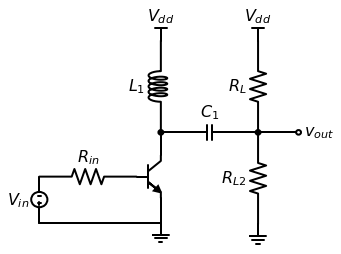

In [25]:
d = schem.Drawing()
T = d.add(e.BJT_NPN)
Ri = d.add(e.RES, d='left', xy=T.base, label='$R_{in}$')
Vi = d.add(e.SOURCE_V,d='down',label='$V_{in}$', zoom=0.5)
d.add(e.LINE,d='right',  tox=T.emitter)
d.add(e.GND)
d.add(e.LINE,d='up',  toy=T.emitter)
d.add(e.LINE, xy=T.collector, d='up', l=0.75)
d.add(e.DOT)
C1 = d.add(e.CAP, d='right', label='$C_1$')
d.add(e.DOT)
d.add(e.LINE, d='right', l=1.25)
dot=d.add(e.DOT_OPEN, rgtlabel='$v_{out}$')
R = d.add(e.RES, xy=C1.end, d='up', label='$R_L$')
d.add(e.VDD, label='$V_{dd}$')
R2 = d.add(e.RES, xy=C1.end, d='down', label='$R_{L2}$')
d.add(e.GND)
L1 = d.add(e.INDUCTOR2, xy=C1.start, d='up', label='$L_1$')
d.add(e.VDD, label='$V_{dd}$',xy=L1.end)
d.draw()

#### Versterker met 2 Klasse C trappen: stap 3

De belastingsweerstand $R_{L2}$ kunnen we vervangen door een (voorwaarts gebiaste) diode ($D_L$). Dit schema zie je in {numref}`cfig24`. Aangezien een voorwaarts gebiaste diode een lage aanweerstand heeft (of dus een hoge geleidbaarheid), zal de meerderheid van de stroom tijdens het voorwaarts gedeelte van de swing door de diode gaan. 

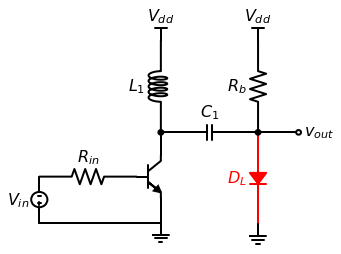

In [26]:
d = schem.Drawing()
T = d.add(e.BJT_NPN)
Ri = d.add(e.RES, d='left', xy=T.base, label='$R_{in}$')
Vi = d.add(e.SOURCE_V,d='down',label='$V_{in}$', zoom=0.5)
d.add(e.LINE,d='right',  tox=T.emitter)
d.add(e.GND)
d.add(e.LINE,d='up',  toy=T.emitter)
d.add(e.LINE, xy=T.collector, d='up', l=0.75)
d.add(e.DOT)
C1 = d.add(e.CAP, d='right', label='$C_1$')
d.add(e.DOT)
d.add(e.LINE, d='right', l=1.25)
dot=d.add(e.DOT_OPEN, rgtlabel='$v_{out}$')
R = d.add(e.RES, xy=C1.end, d='up', label='$R_b$')
d.add(e.VDD, label='$V_{dd}$')
diode = d.add(e.DIODE_F, xy=C1.end, d='down', label='$D_L$',color="red")
d.add(e.GND)
L1 = d.add(e.INDUCTOR2, xy=C1.start, d='up', label='$L_1$')
d.add(e.VDD, label='$V_{dd}$',xy=L1.end)
d.draw()

#### Versterker met 2 Klasse C trappen: stap 4

In een volgende stap versterken we de stroom door de last diode $D_L$ met een factor $\beta_F$ van een transistor. De werking blijft hetzelfde, maar in $R_L$ krijgen we een factor $\beta_F$ meer stroom. Dit schema zie je in {numref}`cfig26`.

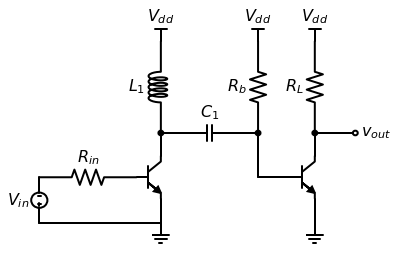

In [27]:
d = schem.Drawing()
T = d.add(e.BJT_NPN)
Ri = d.add(e.RES, d='left', xy=T.base, label='$R_{in}$')
Vi = d.add(e.SOURCE_V,d='down',label='$V_{in}$', zoom=0.5)
d.add(e.LINE,d='right',  tox=T.emitter)
d.add(e.GND)
d.add(e.LINE,d='up',  toy=T.emitter)
d.add(e.LINE, xy=T.collector, d='up', l=0.75)
d.add(e.DOT)
C1 = d.add(e.CAP, d='right', label='$C_1$')
d.add(e.DOT)
Rb = d.add(e.RES, xy=C1.end, d='up', label='$R_b$')
d.add(e.VDD, label='$V_{dd}$')
d.add(e.LINE,d='down', xy=C1.end,  toy=T.base)
d.add(e.LINE,  d='right', l=1)
T2 = d.add(e.BJT_NPN, d='right')
d.add(e.LINE,d='down',xy=T2.emitter,  toy=Vi.end)
d.add(e.GND)
d.add(e.LINE,xy=T2.collector, d='up', toy=Rb.start)
d.add(e.DOT)
RL = d.add(e.RES, d='up', label='$R_L$')
d.add(e.VDD, label='$V_{dd}$')
d.add(e.LINE,xy=RL.start, d='right', l=1.25)
dot=d.add(e.DOT_OPEN, rgtlabel='$v_{out}$')
L1 = d.add(e.INDUCTOR2, xy=C1.start, d='up', label='$L_1$')
d.add(e.VDD, label='$V_{dd}$',xy=L1.end)
d.draw()

#### Versterker met 2 Klasse C trappen: stap 5

De belasting $R_L$ in {numref}`cfig26` kan nu terug resonant gemaakt worden door het invoeren van de 2de trilkring op basis van $L_2$ en $C_2$. We hebben nu een 2-trap klasse C versterker met 2 resonante kringen. Dit schema zie je in in {numref}`cfig27`. Het spreek vanzelf dat we hier 

$$\frac{1}{L_1 C_1} = \frac{1}{L_2 C_2}$$

moeten kiezen.

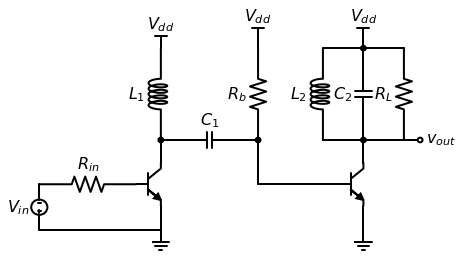

In [28]:
d = schem.Drawing()
T = d.add(e.BJT_NPN)
Ri = d.add(e.RES, d='left', xy=T.base, label='$R_{in}$')
Vi = d.add(e.SOURCE_V,d='down',label='$V_{in}$', zoom=0.5)
d.add(e.LINE,d='right',  tox=T.emitter)
d.add(e.GND)
d.add(e.LINE,d='up',  toy=T.emitter)
d.add(e.LINE, xy=T.collector, d='up', l=0.75)
d.add(e.DOT)
C1 = d.add(e.CAP, d='right', label='$C_1$')
d.add(e.DOT)
L1 = d.add(e.INDUCTOR2, xy=C1.start, d='up', label='$L_1$')
d.add(e.LINE, d='up',l=0.25)
d.add(e.VDD, label='$V_{dd}$',xy=L1.end)
Rb = d.add(e.RES, xy=C1.end, d='up', label='$R_b$')
d.add(e.LINE, d='up',l=0.25)
d.add(e.VDD, label='$V_{dd}$')
d.add(e.LINE,d='down', xy=C1.end,  toy=T.base)
d.add(e.LINE,  d='right', l=2.5)
T2 = d.add(e.BJT_NPN, d='right')
d.add(e.LINE,d='down',xy=T2.emitter,  toy=Vi.end)
d.add(e.GND)
d.add(e.LINE,xy=T2.collector, d='up', toy=Rb.start)
d.add(e.DOT)
C2 = d.add(e.CAP, d='up', label='$C_2$')
d.add(e.LINE, xy=C2.start, d='left', l=1.25)
L2 = d.add(e.INDUCTOR2, d='up', label='$L_2$')
d.add(e.LINE, xy=C2.start, d='right', l=1.25)
RL = d.add(e.RES, d='up', label='$R_L$')
d.add(e.LINE, xy=RL.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN, rgtlabel='$v_{out}$')
d.add(e.LINE,xy=RL.end, d='left', tox=C2.end)
d.add(e.DOT)
d.add(e.LINE, d='right',xy=L2.end, tox=C2.end)
d.add(e.LINE, d='up',l=0.25)
d.add(e.VDD, label='$V_{dd}$')
d.draw()

#### Versterker met 3 Klasse C trappen

Volgens de zelfde redenering kunnen we ook een derde klasse C versterkertrap toevoegen. Dit schema zie je in {numref}`cfig28`. Hier geldt: 

$$\frac{1}{L_1 C_1} = \frac{1}{L_2 C_2}= \frac{1}{L_3 C_3}$$

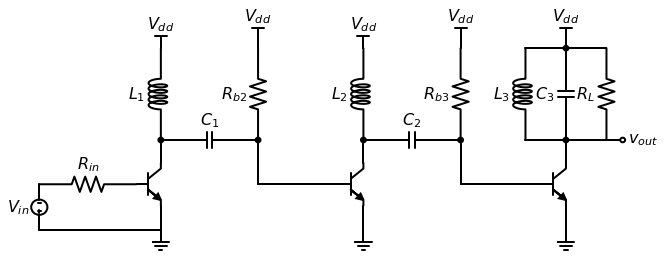

In [22]:
d = schem.Drawing()
T = d.add(e.BJT_NPN)
Ri = d.add(e.RES, d='left', xy=T.base, label='$R_{in}$')
Vi = d.add(e.SOURCE_V,d='down',label='$V_{in}$', zoom=0.5)
d.add(e.LINE,d='right',  tox=T.emitter)
d.add(e.GND)
d.add(e.LINE,d='up',  toy=T.emitter)
d.add(e.LINE, xy=T.collector, d='up', l=0.75)
d.add(e.DOT)
C1 = d.add(e.CAP, d='right', label='$C_1$')
d.add(e.DOT)
L1 = d.add(e.INDUCTOR2, xy=C1.start, d='up', label='$L_1$')
d.add(e.LINE, d='up',l=0.25)
d.add(e.VDD, label='$V_{dd}$',xy=L1.end)
Rb = d.add(e.RES, xy=C1.end, d='up', label='$R_{b2}$')
d.add(e.LINE, d='up',l=0.25)
d.add(e.VDD, label='$V_{dd}$')
d.add(e.LINE,d='down', xy=C1.end,  toy=T.base)
d.add(e.LINE,  d='right', l=2.5)
T2 = d.add(e.BJT_NPN, d='right')
d.add(e.LINE,d='down',xy=T2.emitter,  toy=Vi.end)
d.add(e.GND)

d.add(e.LINE, xy=T2.collector, d='up', l=0.75)
d.add(e.DOT)
C2 = d.add(e.CAP, d='right', label='$C_2$')
d.add(e.DOT)
L2 = d.add(e.INDUCTOR2, xy=C2.start, d='up', label='$L_2$')
d.add(e.LINE, d='up',l=0.25)
d.add(e.VDD, label='$V_{dd}$',xy=L2.end)
Rb2 = d.add(e.RES, xy=C2.end, d='up', label='$R_{b3}$')
d.add(e.LINE, d='up',l=0.25)
d.add(e.VDD, label='$V_{dd}$')
d.add(e.LINE,d='down', xy=C2.end,  toy=T2.base)
d.add(e.LINE,  d='right', l=2.5)
T3 = d.add(e.BJT_NPN, d='right')
d.add(e.LINE,d='down',xy=T3.emitter,  toy=Vi.end)
d.add(e.GND)

d.add(e.LINE,xy=T3.collector, d='up', toy=Rb.start)
d.add(e.DOT)
C3 = d.add(e.CAP, d='up', label='$C_3$')
d.add(e.LINE, xy=C3.start, d='left', l=1.25)
L3 = d.add(e.INDUCTOR2, d='up', label='$L_3$')
d.add(e.LINE, xy=C3.start, d='right', l=1.25)
RL = d.add(e.RES, d='up', label='$R_L$')
d.add(e.LINE, xy=RL.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN, rgtlabel='$v_{out}$')
d.add(e.LINE,xy=RL.end, d='left', tox=C3.end)
d.add(e.DOT)
d.add(e.LINE, d='right',xy=L3.end, tox=C3.end)
d.add(e.LINE, d='up',l=0.25)
d.add(e.VDD, label='$V_{dd}$')
d.draw()

Het circuit in {numref}`cfig28`wordt ook gebruikt in de GSM transmitter ICs RFMD RF2140 en RF2174. Deze ICs werken tussen 1710 en 1785 MHz, gebruiken een voedingsspanning van 3.2V en bekomen en zendvermogen van 32.7 dBm (ongeveer 2 W) met een efficiëntie van 50.6%. De spoelen ($L_1$,$L_2$ en $L_3$) en de condensator $C_3$ worden wel extern uitgevoerd en zitten dus niet in de IC <cite id="i5wtl"><a href="#zotero|11916217/62LG3FWV">[2]</a></cite>. We herkennen $L_1$ tussen `VCC1` (Pin 5) en $V_{dd}$, $L_2$ tussen `VCC2` (Pinnen 14,15,en 16) en $V_{dd}$ en $L_3$ tussen `RF OUT` (Pinnen 10,11,en 12) en $V_{dd}$.

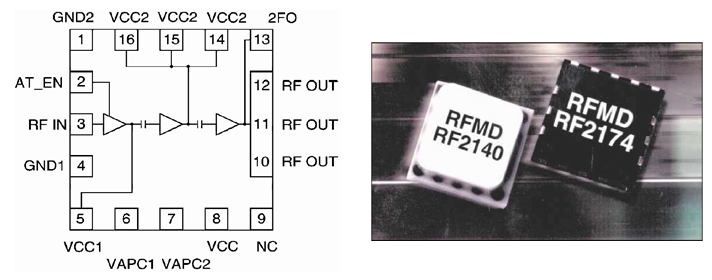

In [6]:
display.Image("./images/RF2140.png")

## Plaatmodulatie

Wanneer we [amplitude modulatie](https://en.wikipedia.org/wiki/Amplitude_modulation) willen bekomen op hoge frequentie, kunnen we dit bekomen door de amplitude aan te passen bij een vaste voedingsspanning. Dit kan door ofwel de amplitude van de stroompulsen ($I_p$) aan te passen of door de geleidingshoek ($\alpha$) aan te passen. 

Echter, zoals we uit de berekeningen van het rendement ($\eta$) bij niet-volledige uitsturing en ook uit simulaties zoals bijvoorbeeld aan de hand van widgets kunnen uitgevoerd worden zoals in {numref}`cfig7`
kunnen afleiden, is het rendement ($\eta$) van een klasse C versterker die niet volledig uitgestuurd wordt tot een amplitude lager dan de voedingsspanning, altijd lager dan wanneer dat wel het geval is. Daarom verkiezen we steeds de klasse C versterker te gebruiken met een amplitude die overeenkomt met de voedingsspanning.

Hoe kunnen we dan die amplitude aanpassen, wel door een klasse B versterker te gebruiken om de voedingsspanning van een klasse C versterker aan te sturen. Dit concept noemen we plaatmodulatie.

{numref}`cfigPlaatmodulatie` toont schematisch aan hoe zo een plaatmodulatie kan gerealiseerd worden. 

In dit geval levert de voeding ($V_{dd}$) het DC vermogen en dus ook de DC stroom die naar de voeding van klasse C versterker gaat. De spoel $L$ moet dan voldoende groot zijn om deze DC stroom nauwkeurig constant te houden. De klasse B versterker moet dan enkel het vermogen leveren om de veranderingen van voedingsspanningen van de klasse C te kunnen bekomen. De condensator $C$ moet derhalve ook groot genoeg zijn om snel genoeg de AC stroom te kunnen leveren die de aanpassingen van de voeding mogelijk maakt.

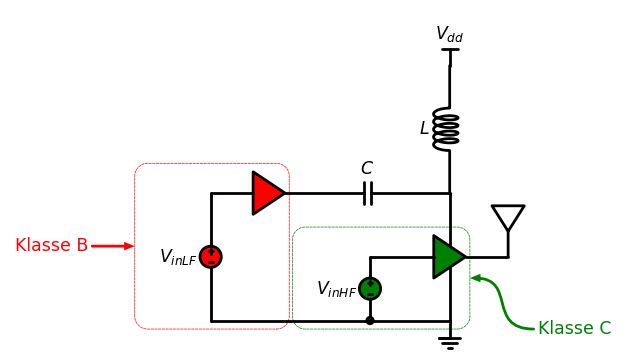

In [2]:
import schemdraw.dsp as dsp

class Amp2(dsp.Amp):
    ''' Amplifier with power and ground
        Anchors:
            * in
            * out
            * vdd
            * gnd
    '''
    def __init__(self, *d, **kwargs):
        super().__init__(*d, **kwargs)
        amph = 1.
        ampl = .75
        self.anchors['vdd'] = (ampl/2, amph/4)
        self.anchors['gnd'] = (ampl/2, -amph/4)
d = schem.Drawing()

Vi = d.add(e.SOURCE_V,d='up',fill='red',label='$V_{in LF}$', zoom=0.5)
d.add(e.LINE,d='right',  l=1)

a1=d.add(dsp.Amp, d='right',fill='red')
d.add(e.LINE, xy=Vi.start, d='right', l=3.75)
d.add(e.DOT)
Vi2 = d.add(e.SOURCE_V,d='up',fill='green',label='$V_{in HF}$', zoom=0.5,l=1.5)
d.add(e.LINE,d='right',  l=1.5)
a2=d.add(Amp2, d='right',fill='green') 
d.add(e.LINE,d='right',l=1 )
d.add(e.Antenna)
d.add(e.LINE,xy=Vi2.start,tox=a2.gnd ,d='right')
d.add(e.GND)
d.add(e.LINE,toy=a2.gnd ,d='up')

C = d.add(e.CAP,xy=a1.out,tox=a2.vdd, label='$C$')
d.add(e.LINE,d='down', toy=a2.vdd)
L = d.add(e.INDUCTOR2,xy=C.end,  d='up', label='$L$')
d.add(e.VDD, label='$V_{dd}$')

classB=d.add(e.EncircleBox([Vi,a1],padx=.1).linestyle('--').linewidth(0.5).color('red'))
classC=d.add(e.EncircleBox([Vi2,a2],padx=.1).linestyle('--').linewidth(0.5).color('green'))

d.add(e.Annotate(th1=0).at(classB.W).delta(dx=-1, dy=0).label('Klasse B').color('red'))
d.add(e.Annotate(th1=0).at(classC.E).delta(dx=1.5, dy=-1.2).label('Klasse C').color('green'))
d.draw()

## Referenties

<!-- BIBLIOGRAPHY START -->
<div class="csl-bib-body">
  <div class="csl-entry"><i id="cite2c|1031761/4VFK3Q4R"></i>
    <div class="csl-left-margin">1.</div><div class="csl-right-inline">J. W. Wood, High efficiency class C amplifier, US3430157A, 1969.</div>
  </div>
  <div class="csl-entry"><i id="zotero|11916217/62LG3FWV"></i>
    <div class="csl-left-margin">2.</div><div class="csl-right-inline">Bruce Schmukler &#38; Jon Jorgenson, Design of a 3-volt HBT Power Amplifier for DCS. <i>Applied Microwave and Wireless</i>, (2000) 116–125.</div>
  </div>
</div>
<!-- BIBLIOGRAPHY END -->


